#1) INTRODUÇÃO

Autoria: Jackson Corrêa

Linkedin: https://www.linkedin.com/in/jackson-corrêa

GitHub: [github.com/JacksonSCorrea](https://)

##1.1) Fonte de dados

Os dados utilizados foram extraídos da plataforma Kaggle.

##1.2) O problema de negócio

O objetivo do problema proposto é ajudar as áreas de negócios do Airbnb a
maximizar a rentabilidade e/ou a taxa de ocupação das casas e apartamentos
disponíveis para aluguel.

##1.3) Abordagem do problema

A abordagem feita neste trabalho visa a maximização da rentabilidade dos imóveis através da previsão de preços otimizados, cm base em ummodelo treinado com os imóveis mais performáticos. Para o desenvolvimento do modelo e extração dos insights para as tomadas de decisão, foram realizadas as etapas abaixo:

<br>

**> Importação, limpeza e preparação dos dados**:

Após a importação, foi verificado a existência de valores faltantes, duplicados, incoerentes, em formato inadequado, etc;

<br>

**> Segmentação dos imóveis:**

A segmentação (ou clusterização) teve o objetivo de agrupar os imóveis de acordo com característcas comuns, de forma a evidenciá-las. Assim, é possível entender com mais profundidade as características de cada agrupamento (cluster)

<br>

**> Análise de eficiência dos imóveis de cada clusters:**

Para cada cluster gerado, foi analisado o desempenho dos imóveis daquele grupo. Com isso, pode-se encontrar os imóveis de melhor e pior performance. Assim, selecinando um grupo de boa performance, é possível entender o que torna um imóvel rentável ou não. Isso permite replicar as estratégias de marketing dos imóveis rentáveis para os não rentáveis. Para esta etapa foi necessário criar uma medida de eficiência que pudesse ser utilizada para a comparação dos imóveis. Por isso, foram feitas algumas considerações na criação de novas variáveis, conforme segue:

<br>

* **A quantidade de reviews em um imóvel**:

  A variável 'number_of_reviews' foi, de forma empírica, relacionada com a quantidade de locações do imóvel. Entende-se que, quanto mais locações um imóvel possui, mais reveiews este imóvel terá.

<br>

* **Razão de Quantidade de Locação por Preço de Locação (number_of_reviews/price):**

  Essa nova variável representará a relação entre a quantidade de locações (ou reviews) e o preço de locação. Essa razão pode ser interpretada como uma medida de eficiência ou popularidade em termos de quantas locações estão ocorrendo em relação ao custo. Por exemplo, se essa razão for alta para um determinado item, significa que muitas locações estão ocorrendo em relação ao seu preço, o que pode indicar uma alta demanda ou boa relação custo-benefício.


<br>

* **Razão de Preço de Locação por Quantidade de Locação (price/number_of_reviews):**

  Essa nova variável representará a relação inversa, ou seja, o preço de locação em relação à quantidade de locações. Isso pode ser interpretado de maneira diferente, como quanto custa cada locação em média. Se essa razão for alta, significa que o preço médio por locação é alto, o que pode indicar que os itens estão sendo alugados a preços mais elevados. Por outro lado, se essa razão for baixa, os itens podem estar sendo alugados a preços mais acessíveis em relação à quantidade de locações.

<br>

* **Eficiência (média harmônica entre as duas novas variáveis):**

  O significado da média harmônica nesse contexto pode ser interpretado como uma medida que tenta capturar um equilíbrio entre a relação entre quantidade de locações e preço de locação. Diferentemente da média aritmética, a média harmônica dá mais peso aos valores menores. Isso significa que, se uma das razões (quantidade de locações por preço ou preço por quantidade de locações) for muito menor do que a outra, a média harmônica será puxada para baixo.

  Em outras palavras, a média harmônica entre essas duas razões pode fornecer uma visão sobre a eficiência geral do sistema de locação. Se ambas as razões forem relativamente equilibradas, a média harmônica será mais alta, indicando um equilíbrio razoável entre o preço e a quantidade de locações. Por outro lado, se uma das razões for significativamente menor, a média harmônica será mais baixa, indicando um desequilíbrio entre preço e quantidade.

<br>

**> Separação de imóveis de melhor e pior performance:**

Também para cada cluster gerado, os imóveis foram divididos em dois grupos. O critério da divisão foi baseado no Pricípio de Pareto, onde 20% das causas causam 80% do efeito. Assim, os imóveis foram ranqueados de acordo com sua eficiência. Foi calculada a "eficiência acumulada" do agrupamento e aqueles imóveis que representavam 80% da eficiência global ("top imóveis") foram separados do restante. Neste ponto são gerdas planilhas para serem disponibilizadas aos times de marketing / negócios.

<br>

**> Análise das features mais importantes para a eficiênca:**

Ainda para cada cluster gerado, foi gerado um modelo de machine Learning, utilizando o algoritmo LightGBM, e usando a variável "eficiência" como target. O objetivo foi encontrar, para aquele cluster, quais variáveis possuem maior efeito na efeiciência do imóvel. Antes de rodar o modelo, foram mantidas somentes as features que:
* Representam características do imóvel e seus ambientes, como tipo de cama, tipo de quarto, quantidade de banheiros
* Representam características da vizinhança, como coordenadas geográficas e descrição da vizinhança
* Representam as condições de negócio do imóvel, como preço, política de cancelamento, etc.

Os restante das features, como os reviews e informações sobre o host, foram eliminadas do modelo de regressão, pois entende-se que os reviews são consequência da melhoria/piora das features que permaneceram. Além disso, desejou-se que informações sobre o host não impactassem na previsão de efciência do imóvel.

**> Geração de insights com base no que foi observado nos agrupamentos:**
Por fim, com base nas informações extraídas, pode-se resumir as informações relevantes para implementação de estratégias de maximização da locação dos imóveis.

##1.4) Dicionário de dados


* host_is_superhost: é um considerado um superhost
* cancellation_policy: politica de cancelamento
* instant_bookable: é instantaneamente bookavel
* host_total_listings_count: Número de vezes que o host bookou
* neighbourhood_cleansed: limpeza do bairro
* latitude: latitude
* longitude: longitude
* property_type: tipo de propriedade
* room_type: tipo do quarto
* accommodates: acomoda quantas pessoas
* bathrooms: banheiros
* bedrooms: quartos
* beds:camas
* bed_type: tipo da cama
* minimum_nights: minímo de noites para aluguel
* number_of_reviews: número de reviews
* review_scores_rating: nota da avaliação
* review_scores_accuracy: score de pontualidade
* review_scores_cleanliness: score de limpeza
* review_scores_checkin: score de avaliação do checkin
* review_scores_communication: score de comunicação
* review_scores_location: score da localização
* review_scores_value: score de preço
* price: preço
* review_scores_rating_na: numero de avaliações
* review_scores_accuracy_na: numero de avaliações da pontualidade
* review_scores_cleanliness_na: numero de avaliações da limpeza
* review_scores_checkin_na: numero de avaliações
* review_scores_communication_na: numero de avaliações de comunicação
* review_scores_location_na: numero de avaliações da localização
* review_scores_value_na: numero de avaliações do valor

##1.5) Convenções

A seguir, estão listadas algumas convenções de sufixos e siglas utilizadas no nome de variáveis, com o intuito de deixar o código mais intuitivo à leitura:

* data - dataframe / dataset
* df - dataframe
* aux - auxiliar
* X_train - dados de treino ('X' maiúsculo)
* X_test - dados de teste ('X' maiúsculo)
* y_train - rótulos de treino ('y' minúsculo)
* y_test - rótulos de teste ('y' minúsculo)
* enc - encoded / encoding
* std - standard / padronização
* norm - normalized / normalizado / normalização
* transf - transformed / transformado
* base - baseline / base
* ori - original
* ens - ensemble
* opt - optimized / otimizado / ótimo / tunado
* eda - Exploratory Data Analytics
* os - oversampling
* us - undersampling
* new - novo / inédito
* prod - produção
* raw - cru / bruto
<br><br>

##1.6) Importação das bibliotecas

In [1]:
# Instalando a biblioteca 'category_encoders'
!pip install category_encoders
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 344.9 kB/s eta 0:00:00


In [2]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import make_scorer, mean_squared_error, r2_score, silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA

from category_encoders import CatBoostEncoder, CountEncoder

import pickle

##1.7) Definição de funções

In [3]:
# Função para plotar gráfico de barras, com percentual, para variáveis categóricas
# Tambem funciona para variáveis numéricas

def plota_cat(df, var, b, h, pad, dist, casas):


  # Dataframe auxiliar
  df_aux = df.copy()

  # Distribuição
  df_aux[var] = df_aux[var].astype(str)
  df_aux = df_aux.groupby(var).size().sort_values(ascending=False)
  tot=df_aux.shape
  tot=df_aux.values.sum()
  x=df_aux.index
  y=100*(df_aux.values/tot)

  # Gráfico
  fig, ax = plt.subplots(figsize=(b,h))
  sns.barplot(x=x, y=y)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  ax.set_yticklabels(ax.get_yticklabels(), visible=False)
  ax.set_title(f'Distribuição da variável "{var}"',pad=pad)
  ax.set_xlabel('')
  ax.set_ylabel('')
  plt.gca().set_yticks([])
  plt.gca().set_ylabel('')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  for i,v in enumerate(df_aux):
    ax.text(i,100*(v/tot)+dist, str(round(100*(v/tot),casas)) + " %",ha='center',va='bottom',fontsize=9,rotation=90)

  plt.show()

In [4]:
# Função para plotar histograma e boxplot de variáveis numéricas

def plota_num(df, var, b, h, stat, pad):

  # Dataframe auxiliar
  df_aux = df.copy()


  # Gráfico
  fig, ax = plt.subplots(1,2, figsize=(b,h))

  sns.histplot(df[var], alpha=0.7, stat =stat, kde=True, ax=ax[0])
  ax[0].set_title(f'Distribuição da variável "{var}"',pad=pad)
  ax[0].set_xlabel(var)
  ax[0].spines['top'].set_visible(False)
  ax[0].spines['right'].set_visible(False)

  sns.boxplot(df[var], ax=ax[1], orient='h')
  ax[1].set_title(f'Boxplot da variável "{var}"',pad=pad)
  ax[1].set_xlabel(var)
  ax[1].spines['top'].set_visible(False)
  ax[1].spines['right'].set_visible(False)


  plt.show()

In [5]:
# Função para plotar o gráfico de dispersão entre variáveis

def plota_corr(df, var, target1, target2, b, h, pad):

  fig, ax = plt.subplots(1,2,figsize=(b, h))

  sns.scatterplot(x=df[var],y=df[target1], ax = ax[0])
  ax[0].set_title(f'Dispersão de "{target1}" em relação a "{var}"', pad=pad)
  ax[0].set_xlabel(var)
  ax[0].spines['top'].set_visible(False)
  ax[0].spines['right'].set_visible(False)

  sns.scatterplot(x=df[var],y=df[target2], ax = ax[1])
  ax[1].set_title(f'Dispersão de "{target2}" em relação a "{var}"', pad=pad)
  ax[1].set_xlabel(var)
  ax[1].spines['top'].set_visible(False)
  ax[1].spines['right'].set_visible(False)

  plt.show()

In [6]:
# Função que cria métricas de eficiência

def eficiencia(df):

  # Criando um ID para imóvel a partir do index
  df['ID'] = df.index

  # Substituindo os valores de 0, se houver, para não ocorrer indeterminação
  df['price'] = df['price'].apply(lambda x: 0.1 if x==0 else x)

  # Substituindo os valores de 0, se houver, para não ocorrer indeterminação
  df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: 0.1 if x==0 else x)

  # Criando a feature Preço/Num_avaliações
  df['p/n'] = df['price'] / df['number_of_reviews']

  # Criando a feature Num_avaliações/Preço
  df['n/p'] = df['number_of_reviews'] / df['price']

  # Criando a feature que representa a média harmônica - chamada de eficiência
  df['efic'] = 2 * ( df['price'] * df['number_of_reviews'] ) / (df['price']**2 + df['number_of_reviews']**2)

  # Ordenando de acordo com a eficiência
  df = df.sort_values(by=['efic'], ascending=False)

  # Calculando a eficiência cumulativa
  df['efic_cumsum'] = df['efic'].cumsum()

  return df

  # NOTA: para o cálculo da eficiência foi considerado que, de forma empírica,
  # quanto mais locações um imóvel possui, mais reviews são gerados.
  # Com isso, essas duas features foram correlacionadas para que a quantidade
  # de reviews fosse utilizada no cálculo da medida de eficiência.

In [7]:
# Função que separa os dados de acordo com um percentual
# de eficiência acumulada passado.

def separa_imoveis(df, percent, num_cluster):

  # Limite de eficiência acumulada
  limite = (percent/100) * df['efic'].sum()

  # Top imóveis
  top_imoveis = df[df['efic_cumsum'] <= limite]
  top_imoveis.to_excel(f'Top imóveis - Cluster {num_cluster}.xlsx', index=False)

  # Restante de imóveis:
  rest_imoveis = df[df['efic_cumsum'] > limite]
  top_imoveis.to_excel(f'Restante imóveis - Cluster {num_cluster}.xlsx', index=False)

  # Cálculo percentual
  top = top_imoveis.shape[0]
  tot = df.shape[0]
  rel = round(100* top / tot , 1)

  print(f'''
  Responsáveis por 80% da eficiência global: {top} imóveis
  Quantidade total de imóveis:               {tot} imóveis
  Responsáveis por 80% da eficiência global: {rel} %
    ''')

  return top_imoveis, rest_imoveis


In [8]:
# Função que plota o gráfico de barras de uma variável categórica em relação
# a dois dataset's distintos

def plota_cat2(df1, df2, var, b, h, pad, dist, casas):
    # Cálculos para escala comum
    df1[var] = df1[var].astype(str)
    df2[var] = df2[var].astype(str)
    df1_counts = df1.groupby(var).size()
    df2_counts = df2.groupby(var).size()
    max_count = max(df1_counts.max(), df2_counts.max())

    # Plot do gráfico
    sns.set(style="whitegrid")  # Configurar o grid comum

    fig, ax = plt.subplots(1, 2, figsize=(b, h), sharey=True)  # Compartilhar escala no eixo y

    # ===================== Gráfico 1 ========================

    # Cálculos
    df1 = df1_counts.sort_values(ascending=False)
    tot1 = df1.sum()
    x1 = df1.index
    y1 = 100 * (df1.values / tot1)

    # Gráfico
    sns.barplot(x=x1, y=y1, ax=ax[0])

    # Elementos do gráfico
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    ax[0].set_yticklabels(ax[0].get_yticklabels(), visible=False)
    ax[0].set_title(f'Distribuição da variável "{var}"\nTOP IMÓVEIS', pad=pad)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)

    # Textos do gráfico
    for i, v in enumerate(df1):
        ax[0].text(i, 100 * (v / tot1) + dist, str(round(100 * (v / tot1), casas)) + " %",
                   ha='center', va='bottom', fontsize=9, rotation=90)

    # ===================== Gráfico 2 ========================

    # Cálculos
    df2 = df2_counts.sort_values(ascending=False)
    tot2 = df2.sum()
    x2 = df2.index
    y2 = 100 * (df2.values / tot2)

    # Gráfico
    sns.barplot(x=x2, y=y2, ax=ax[1])

    # Elementos do gráfico
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_yticklabels(ax[1].get_yticklabels(), visible=False)
    ax[1].set_title(f'Distribuição da variável "{var}"\nSTANDARD IMÓVEIS', pad=pad)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)

    # Textos do gráfico
    for i, v in enumerate(df2):
        ax[1].text(i, 100 * (v / tot2) + dist, str(round(100 * (v / tot2), casas)) + " %",
                   ha='center', va='bottom', fontsize=9, rotation=90)

    plt.gca().set_yticks([])
    plt.gca().set_ylabel('')

    plt.show()

In [9]:
# Função que plota o histograma de uma variável numérica em relação
# a dois dataset's distintos


def plota_num2(df1, df2, var, b, h, stat, pad):

  # Dataframe auxiliar
  df_aux = df.copy()


  # Gráfico
  fig, ax = plt.subplots(1,2, figsize=(b,h))

  sns.histplot(df1[var], alpha=0.7, stat =stat, ax=ax[0])
  ax[0].set_title(f'Distribuição da variável "{var}"\nTOP IMÓVEIS',pad=pad)
  ax[0].set_xlabel(var)
  ax[0].spines['top'].set_visible(False)
  ax[0].spines['right'].set_visible(False)

  sns.histplot(df2[var], alpha=0.7, stat =stat, ax=ax[1])
  ax[1].set_title(f'Distribuição da variável "{var}"\nSTANDARD IMÓVEIS',pad=pad)
  ax[1].set_xlabel(var)
  ax[1].spines['top'].set_visible(False)
  ax[1].spines['right'].set_visible(False)


  plt.show()

In [10]:
# Função para rodar um modelo de regressão com Extreme Gradient Boosting (XGBoosting)
# A função permite:
# - Exibir métricas da validação cruzada
# - Exibir o gráfico de feature importance
# - Fazer predições de preço sugerido no dataset passado

def feature_importance(df, df_new, max_depth,l_rate,n_estimators, min_child):

  #=============================================================================
  # Embaralhando o dataset
  df = df.sample(frac=1, random_state=42)
  df_new = df_new.sample(frac=1, random_state=42)

  #=============================================================================
  # Separação em treino e teste
  X = df.drop(['latitude','longitude','number_of_reviews','price','cluster', 'ID', 'p/n', 'n/p', 'efic','efic_cumsum'], axis=1)
  X_new = df_new.drop(['latitude','longitude','number_of_reviews','price','cluster', 'ID', 'p/n', 'n/p', 'efic','efic_cumsum'], axis=1)
  y = df['price']

  #=============================================================================
  # Convertendo variáveis categóricas em numéricas

  # Buscando as variáveis categóricas
  var_cat = list( X.select_dtypes(include='object').columns )

  # Instanciando
  encoder  = CatBoostEncoder(cols=var_cat)

  # Fit e transform
  X_enc = encoder.fit_transform(X, y)     #fit e transform, passando a target
  X_new_enc = encoder.transform(X_new)    #somente transform

  #=============================================================================
  # Escalando os dados

  # Instanciando
  std_scaler = StandardScaler()

  # Padronização
  X_enc_std = std_scaler.fit_transform(X_enc) #fit e transform
  X_new_enc_std = std_scaler.transform(X_new_enc) #somente transform

  #=============================================================================
  #Criando o modelo regressor

  # Instanciando
  model = xgb.XGBRegressor( max_depth= max_depth ,
                           learning_rate = l_rate,
                           n_estimators = n_estimators ,
                            min_child_weight =  min_child ,
                            random_state=42 )

  # Treinando
  model.fit(X_enc_std, y)

  # Criando os tipos de scoring para aplicar no cross_val
  mse_metric = make_scorer(mean_squared_error)
  r2_metric = make_scorer(r2_score)

  # Validação cruzada - cálculo do rmse (MSE é uma medida de mesma unidade da target - preço)
  mse_cv = cross_val_score(model, X_enc_std, y, cv=5 , scoring = mse_metric)
  rmse = np.sqrt( np.mean ( mse_cv ) )
  rmse = round(rmse, 2)

  # Validação cruzada - cálculo do R²
  r2_cv = cross_val_score(model, X_enc_std, y, cv=5, scoring = r2_metric)
  r2 = np.mean ( r2_cv )
  r2 = round(r2, 2)


  #=============================================================================
  # Extraindo a importância das features
  importances = model.feature_importances_
  feature_names = X.columns
  sorted_indices = np.argsort(importances)[::-1]
  sorted_importances = importances[sorted_indices]
  sorted_feature_names = [feature_names[i] for i in sorted_indices]


  #=============================================================================
  # Criação da classe de exibição dos reultados
  class Result:
      def __init__(self, model, importances, feature_names, rmse, r2, df_new, X_new_enc_std, encoder, std_scaler):
          self.model = model
          self.importances = importances
          self.feature_names = feature_names
          self.rmse = rmse
          self.r2 = r2
          self.df_new = df_new
          self.X_new_enc_std = X_new_enc_std
          self.encoder = encoder
          self.std_scaler = std_scaler

      # Gráfico para Feature Importance
      def feature_importance_plot(self):
          fig, ax = plt.subplots(figsize=(8, 5))
          sns.barplot(x=self.importances, y=self.feature_names, ax=ax, color='steelblue')
          ax.set_title('Importância das Features', pad=20, fontsize=12)
          ax.set_xlabel('Importância', fontsize=12)
          ax.set_ylabel('Features', fontsize=12)
          ax.spines['top'].set_visible(False)
          ax.spines['right'].set_visible(False)
          plt.show()


      # Plotagem de métricas da validação cruzada
      def metrics(self):
          print(f'RMSE = $ {self.rmse}')
          print(f'R² = {self.r2}')


      def predict_price(self):
        y_pred_new = self.model.predict(self.X_new_enc_std)
        df_new_price = self.df_new.copy()
        df_new_price.reset_index(drop=True, inplace=True) #Garantindo o casamento dos índices
        df_new_price['new_price'] = y_pred_new
        df_new_price['new_price'] = df_new_price['new_price'].apply(lambda x: round(x , 1))
        return df_new_price

      def extract_model(self):
        return self.model

      def extract_encoder(self):
        return self.encoder

      def extract_scaler(self):
        return self.std_scaler


  # Encapsulamento
  result = Result(model, sorted_importances, sorted_feature_names, rmse, r2, df_new, X_new_enc_std, encoder, std_scaler)

  return result

##1.8) Importação do dataset

In [11]:
# Importando o dataset em formato xlsx
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projetos pessoais/01. Projetos Machine Learning/Airbnb/Teste Prático_ Cientista de Dados_JACKSON.xlsx')

# criando um backup
df=data.copy()

#2) PREPARAÇÃO DOS DADOS

In [12]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7146 entries, 0 to 7145
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               7146 non-null   object 
 1   cancellation_policy             7146 non-null   object 
 2   instant_bookable                7146 non-null   object 
 3   host_total_listings_count       7146 non-null   float64
 4   neighbourhood_cleansed          7146 non-null   object 
 5   latitude                        7146 non-null   float64
 6   longitude                       7146 non-null   float64
 7   property_type                   7146 non-null   object 
 8   room_type                       7146 non-null   object 
 9   accommodates                    7146 non-null   float64
 10  bathrooms                       7146 non-null   object 
 11  bedrooms                        7146 non-null   float64
 12  beds                            71

Embora não exista diretamente a uma variável com a quantidade de locações, a variável number_of_reviews pode ser uma substituta razoável, já que geralmente propriedades com mais locações também tendem a acumular mais avaliações. Sendo assim, serão analisadas as correlações desta features com as demais variáveis.

In [13]:
# Cardinalidade das variáveis (valores únicos por variável)
df.nunique().sort_values(ascending=False)

longitude                         4787
latitude                          4682
price                              475
number_of_reviews                  372
host_total_listings_count           66
minimum_nights                      45
review_scores_rating                39
neighbourhood_cleansed              36
property_type                       26
bathrooms                           16
accommodates                        16
beds                                14
review_scores_cleanliness            9
review_scores_accuracy               9
review_scores_location               9
bedrooms                             9
review_scores_communication          8
review_scores_value                  8
review_scores_checkin                7
cancellation_policy                  6
bed_type                             5
room_type                            3
review_scores_accuracy_na            2
review_scores_location_na            2
review_scores_communication_na       2
review_scores_checkin_na 

In [14]:
# Convertendo o formato de alguns valores numéricos
lista=['host_total_listings_count','accommodates','bedrooms','beds','minimum_nights','number_of_reviews']
df[lista] = df[lista].astype(int)

Para a variável "bathrooms" ocorreu erro no momento da conversão.
Assim, é necessário investigar o motivo do erro.

In [15]:
# Verificando os valores presentes
for i in df['bathrooms'].unique():
  print(f'- {i}')

- 1.0
- 4.0
- 2022-05-01 00:00:00
- 2.0
- 3.0
- 0.0
- 2022-05-02 00:00:00
- 2022-05-03 00:00:00
- 0.5
- 8.0
- 10.0
- 2022-05-04 00:00:00
- 14.0
- 5.0
- 2022-05-05 00:00:00
- 6.0


Alguns valores são incoerentes e precisam ser tratados para que seja possível converter a variável para o formato 'int':
* Valores de data
* Valores iguais a 0.5
* Valores iguais a 0

In [16]:
# Visualizando o agrupamento da quantidade de banheiros por tipo de quarto
df_aux = df[['room_type','bathrooms']]
df_aux.groupby(['room_type','bathrooms']).size()

room_type        bathrooms          
Entire home/apt  2022-05-01 00:00:00     272
                 2022-05-02 00:00:00     137
                 2022-05-03 00:00:00      42
                 2022-05-04 00:00:00       8
                 2022-05-05 00:00:00       1
                 0.0                       2
                 0.5                       2
                 1.0                    3023
                 2.0                     772
                 3.0                      90
                 4.0                      13
                 5.0                       2
Private room     2022-05-01 00:00:00     202
                 2022-05-02 00:00:00      23
                 2022-05-03 00:00:00       3
                 0.0                      25
                 0.5                      15
                 1.0                    2059
                 10.0                      2
                 14.0                      1
                 2.0                     200
                 3

Os valores incoerentes serão substitúídos por 1, pois entede-se que é o número ínimo de banheiros disónível em qualquer local para acomodação, mesmo que seja em quarto compartilhado.

In [17]:
  # Fazendo a substituição

df['bathrooms'] = df['bathrooms'].apply(lambda x: str(x))                       #Converte em string se for datetime ou int
df['bathrooms'] = df['bathrooms'].apply(lambda x: x if len(x) <= 4 else '1.0')  #Se o tamanho da string for muito grande ou for igual a 0.5, substitui pela moda

df['bathrooms'] =   df['bathrooms'].astype(float)                               #Converte para float
df['bathrooms'] = df['bathrooms'].apply(lambda x: 1 if x <1 else x)             #Converte os valores 0.5 e 0 para 1
df['bathrooms'] =   df['bathrooms'].astype(int)                                 #Converte agora para formato int

In [18]:
# Verificando novamente os valores presentes
for i in df['bathrooms'].unique():
  print(f'{i}')

1
4
2
3
8
10
14
5
6


In [19]:
# Verificando o tipo da variável
df['bathrooms'].dtype

dtype('int64')

In [20]:
# Visualizando o dataset - Transposto para caber na tela
df.sample(3).T

3870  \
host_is_superhost                                         f   
cancellation_policy             strict_14_with_grace_period   
instant_bookable                                          t   
host_total_listings_count                                 2   
neighbourhood_cleansed                              Mission   
latitude                                          3775194.0   
longitude                                       -12241038.0   
property_type                                     Apartment   
room_type                                   Entire home/apt   
accommodates                                              4   
bathrooms                                                 1   
bedrooms                                                  2   
beds                                                      2   
bed_type                                           Real Bed   
minimum_nights                                            3   
number_of_reviews                                         5   
review_scores_rating                                   95.0   
review_scores_accuracy                                 10.0   
review_scores_cleanliness                              10.0   
review_scores_checkin                                  10.0   
review_scores_communication                            10.0   
review_scores_location                                 10.0   
review_scores_value                                     9.0   
price                                                 120.0   
bedrooms_na                                             0.0   
bathrooms_na                                            0.0   
beds_na                                                 0.0   
review_scores_rating_na                                 0.0   
review_scores_accuracy_na                               0.0   
review_scores_cleanliness_na                            0.0   
review_scores_checkin_na                                0.0   
review_scores_communication_na                          0.0   
review_scores_location_na                               0.0   
review_scores_value_na                                  0.0   

                                                 5252          1867  
host_is_superhost                                   t             f  
cancellation_policy                          moderate      moderate  
instant_bookable                                    f             f  
host_total_listings_count                         852             3  
neighbourhood_cleansed          Downtown/Civic Center  Outer Sunset  
latitude                                    3778667.0     3776258.0  
longitude                                 -12241451.0   -12250822.0  
property_type                               Apartment         House  
room_type                             Entire home/apt  Private room  
accommodates                                        2             2  
bathrooms                                           1             1  
bedrooms                                            1             1  
beds                                                1             2  
bed_type                                     Real Bed      Real Bed  
minimum_nights                                     30             2  
number_of_reviews                                   0            79  
review_scores_rating                             98.0          89.0  
review_scores_accuracy                           10.0           9.0  
review_scores_cleanliness                        10.0           9.0  
review_scores_checkin                            10.0          10.0  
review_scores_communication                      10.0          10.0  
review_scores_location                           10.0           9.0  
review_scores_value                              10.0           9.0  
price                                           172.0          95.0  
bedrooms_na                                       0.0           0.0  
bathrooms_na                 

As últimas 10 variáveis (review_scores_xxxxxxx_na) não fazem muito sentido quando observado o dicionário de dados.

Sendo assim, serão inutilizadas.

In [21]:
# Dropando variáveis que não são inerentes ao imóvel
variaveis = ['host_is_superhost','host_total_listings_count',
        'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
        'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value', 'bedrooms_na', 'bathrooms_na', 'beds_na',
        'review_scores_rating_na', 'review_scores_accuracy_na', 'review_scores_cleanliness_na',
        'review_scores_checkin_na', 'review_scores_communication_na',
        'review_scores_location_na', 'review_scores_value_na']

df = df.drop(variaveis,axis=1)

In [22]:
# Sumarização do dataset - features numéricas
df.describe()

latitude     longitude  accommodates    bathrooms     bedrooms  \
count  7.146000e+03  7.146000e+03   7146.000000  7146.000000  7146.000000   
mean   3.430809e+06 -1.114719e+07      3.201092     1.241394     1.342709   
std    1.033566e+06  3.319669e+06      1.914916     0.733731     0.932855   
min    3.772000e+01 -1.225131e+07      1.000000     1.000000     0.000000   
25%    3.774272e+06 -1.224408e+07      2.000000     1.000000     1.000000   
50%    3.776318e+06 -1.224227e+07      2.000000     1.000000     1.000000   
75%    3.778220e+06 -1.224077e+07      4.000000     1.000000     2.000000   
max    3.781031e+06 -1.223900e+02     16.000000    14.000000    14.000000   

              beds  minimum_nights  number_of_reviews         price  
count  7146.000000     7146.000000        7146.000000   7146.000000  
mean      1.764484       15.817800          43.553876    213.309824  
std       1.176789       22.511624          72.538481    311.375499  
min       0.000000        1.000000           0.000000     10.000000  
25%       1.000000        2.000000           1.000000    100.000000  
50%       1.000000        4.000000          11.000000    150.000000  
75%       2.000000       30.000000          54.000000    235.000000  
max      14.000000      365.000000         677.000000  10000.000000

In [23]:
# Sumarização do dataset - features categóricas
df.select_dtypes(include='object').describe()

cancellation_policy instant_bookable neighbourhood_cleansed  \
count                          7146             7146                   7146   
unique                            6                2                     36   
top     strict_14_with_grace_period                f                Mission   
freq                           3086             4430                    691   

       property_type        room_type  bed_type  
count           7146             7146      7146  
unique            26                3         5  
top        Apartment  Entire home/apt  Real Bed  
freq            3010             4364      7073

#3) SEGMENTAÇÃO DOS IMÓVEIS

##Geração dos agrupamentos

In [24]:
# Criando conjunto de dados somente para clusterização
df_cluster = df.copy()

In [25]:
df_cluster.drop(['price','number_of_reviews','latitude','longitude'],axis=1, inplace=True)

In [26]:
# Transformação de variáveis categóricas em numéricas

# Variáveis categóricas
var_cat= df_cluster.select_dtypes(include='object').columns.tolist()

# Instanciando o encoder
encoder = CountEncoder(cols=var_cat)

# Fit e transform
df_cluster = encoder.fit_transform(df_cluster)    #Fit e transform

Antes da transformação de vaiáveis categóricas em numéricas foram avaliados alguns transformadores e sua aplicabilidade dentro do problema em questão.

As conclusões sobre os transformadores avaliados são as seguintes:

* O OneHotEncoder aumentaria a dimensão dos dados, uma vez que criaria n-1 dummies em cada featurecategórica;
* O LabelEncoder criaria valores hierárquicos que poderiam afetar na previsibilidade do algoritmo como, por exemplo, supor que 3 (quarto compartilhado) é maior que 1 (quarto individual);
* O CatBoostEncoder também foi outro transformador avaliado e que traria bons resultados, além de ser mais seguro ao DataLeakage mas, é necessário informar uma variável alvo (target) para o cálculo dos pesos relativos da categoria.
* Chegamos então na opção de se utilizar o Count Encoder, que trata cada categoria de uma variável categórica atribuindo a ela a contagem de ocorrências dessa categoria no conjunto de dados. Em outras palavras, para cada categoria, o CountEncoder substitui a categoria pelo número de vezes que ela aparece nos dados.

O CountEncoder foi selecionado por entender-se que as transformações seriam satisfatórias.

<br>

In [27]:
# Escalonando os dados para a clusterização com Kmeans

# Instanciando
std_scaler = StandardScaler()
norm_scaler = MinMaxScaler()

# Treinando e transformando - padronização
df_std = std_scaler.fit_transform(df_cluster)   #fit_transform

# Treinando e transformandov - normalização
df_norm = norm_scaler.fit_transform(df_cluster)   #fit_transform

# Nota: KMeans sensível a normalização dos dados devido ao método
# de cálculo de distância euclidiana


<br>

A redução de dimensionalidade será adotada para que as features sejam agrupadas em somente dois componentes. Dessa forma, é possível visualizar um único gráfico de clusters relacionando 'Componente 1' x 'Componente 2'.

Caso a redução de dimensionalidade não fosse utilizada, teríamos que gerar um gráfico para vsualizar os cluster de cada combinação de características. Exemplo: 'Tipo de quarto' x 'Avaliação média', 'Política de cancelamento' x 'Características da vizinhança'.

In [28]:
# Reduzindo a dimensionalidade usando o PCA

# Instanciando:
pca_padronizacao = PCA(n_components=2)
pca_normalizacao = PCA(n_components=2)

# Fit_transform dados padronizados
pca_std = pca_padronizacao.fit_transform(df_std)
variance_std = pca_padronizacao.explained_variance_

# Fit_transform dados normalizados
pca_norm = pca_normalizacao.fit_transform(df_norm)
variance_norm = pca_normalizacao.explained_variance_


# Analisando a variância explicada pelos componentes
print(f'''Variância explicada:

- Dados padronizados: {round(100 * variance_std[0],2)}% , {round(100 * variance_std[1],2)}%
- Dados normalizados: {round(100 * variance_norm[0],2)}% , {round(100 * variance_norm[1],2)}% ''')

Variância explicada:

- Dados padronizados: 285.17% , 139.95%
- Dados normalizados: 23.81% , 13.52% 


Para os dados padronizados, o Componente 1 é capaz de explicar 417% da variância dos dados, e o Componente 2 é capaz de explicar 307%. Estes valores estão incoerentes.

Já para os dados normalizados, os componentes 1 e 2 são capazes de explicar 26%e 22% da variância dos dados, respectivamente. O ideal é que a soma da variância explicada por cada componentes seja próxima de 95%.

<br>

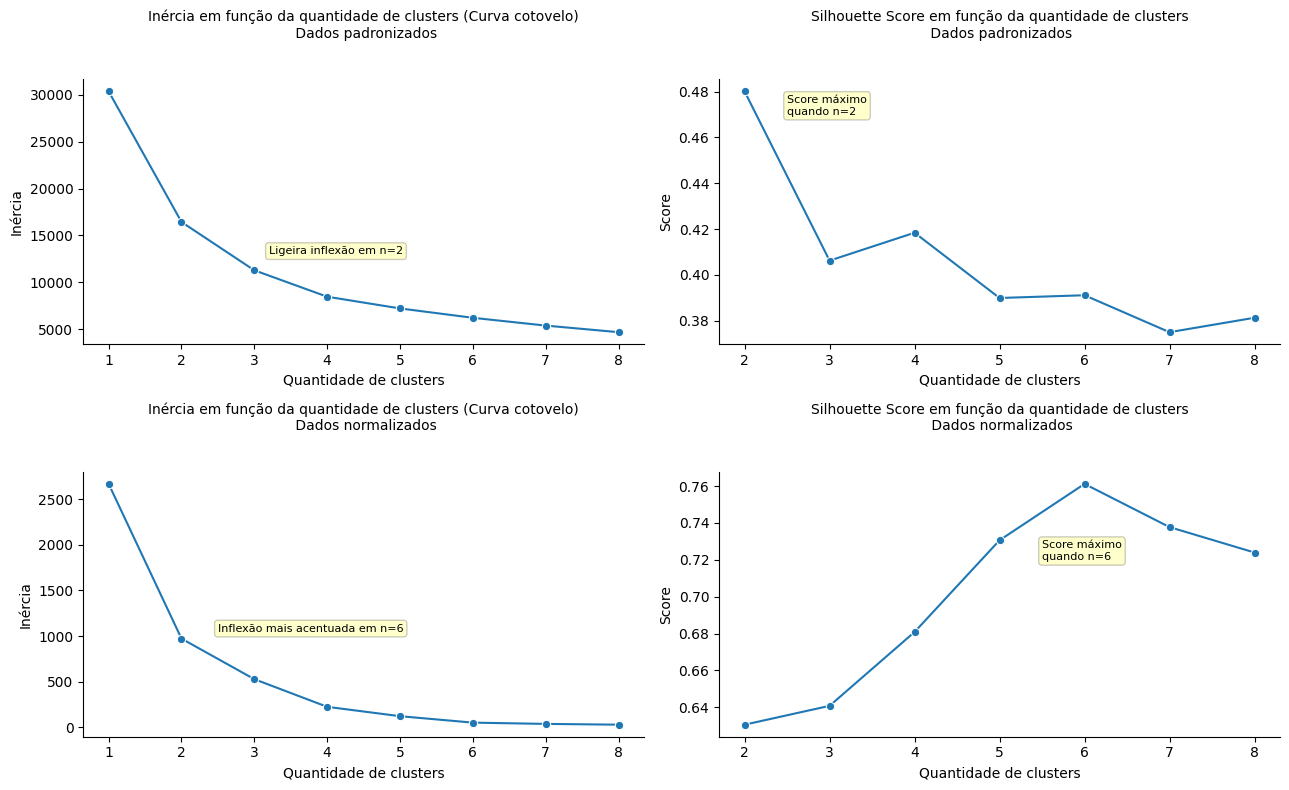

In [37]:
# Encontrando quantidade ideal de clusters

# Definindo tamanho do plot
fig, ax = plt.subplots(2,2, figsize=(13,8))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.4, wspace=0.4, hspace=0.8)

# definindo os dados para rodar as iterações
data1 = pca_std.copy()  #dados padronizados
data2 = pca_norm.copy() #dados normalizados

for index, dt in enumerate((data1, data2)):

  # Definindo a quantidade ideal de clusters com base no Método do Cotovelo (Elbown Method) - Cálculo da inércia
  inercia = []
  range_cluster = range(1,9)

  for i in range_cluster:
    inercia.append(KMeans(n_clusters=i, random_state=42).fit(dt).inertia_)

  # Plotando a curva de cotovelo para verificar o indicativo de quantidade ideal de clusters
  sns.lineplot(x=range_cluster, y=inercia, markers=True, marker='o', ax=ax[index,0])

  # Inserindo título dos gráficos
  if index==0:
      ax[index,0].set_title('Inércia em função da quantidade de clusters (Curva cotovelo)\n Dados padronizados',fontsize=10, pad=30)
  else:
      ax[index,0].set_title('Inércia em função da quantidade de clusters (Curva cotovelo)\n Dados normalizados',fontsize=10, pad=30)

  # Ajustando os elementos dos gráficos
  ax[index,0].set_xlabel('Quantidade de clusters', fontsize=10)
  ax[index,0].set_ylabel('Inércia',fontsize=10)
  ax[index,0].spines['right'].set_visible(False)
  ax[index,0].spines['top'].set_visible(False)

  # Cálculo do Silhouette Score
  sil_score = []
  range_cluster= range(2,9)
  for i in range_cluster:
    sil_score.append(silhouette_score(dt, KMeans(n_clusters=i, random_state=42).fit(dt).labels_))

  # Plotando a curva para verificar quantidade ideal de clusters
  sns.lineplot(x=range_cluster, y=sil_score, markers=True, marker='o', ax=ax[index,1])

  # Inserindo títulos no gráfico
  if index==0:
      ax[index,1].set_title('Silhouette Score em função da quantidade de clusters\n Dados padronizados',fontsize=10, pad=30)
  else:
      ax[index,1].set_title('Silhouette Score em função da quantidade de clusters\n Dados normalizados',fontsize=10, pad=30)

  # Ajustando os elementos do gráfico
  ax[index,1].set_xlabel('Quantidade de clusters',fontsize=10)
  ax[index,1].set_ylabel('Score',fontsize=10)
  ax[index,1].spines['right'].set_visible(False)
  ax[index,1].spines['top'].set_visible(False)

  # Acrescentando texto explicativo
  if index==0:
    ax[index,0].text(3.2,13000,'Ligeira inflexão em n=2',bbox=dict(boxstyle='round',facecolor='yellow', alpha=0.2), fontsize=8)
    ax[index,1].text(2.5,0.47,'Score máximo\nquando n=2',bbox=dict(boxstyle='round',facecolor='yellow', alpha=0.2), fontsize=8)

  else:
    ax[index,0].text(2.5,1050,'Inflexão mais acentuada em n=6',bbox=dict(boxstyle='round',facecolor='yellow', alpha=0.2), fontsize=8)
    ax[index,1].text(5.5,0.72,'Score máximo\nquando n=6',bbox=dict(boxstyle='round',facecolor='yellow', alpha=0.2), fontsize=8)


plt.tight_layout()

In [30]:
# Instanciado o Kmeans e treinando nos dados

# Dados padronizados: 2 clusters
kmeans_std = KMeans(n_clusters=2, random_state=42).fit(pca_std)

# Extração dos rótulos
rotulos_std = kmeans_std.labels_

#=========================================================================

# Dados normalizados: 6 clusters
kmeans_norm = KMeans(n_clusters=6, random_state=42).fit(pca_norm)

# Extraindo os rótulos
rotulos_norm = kmeans_norm.labels_

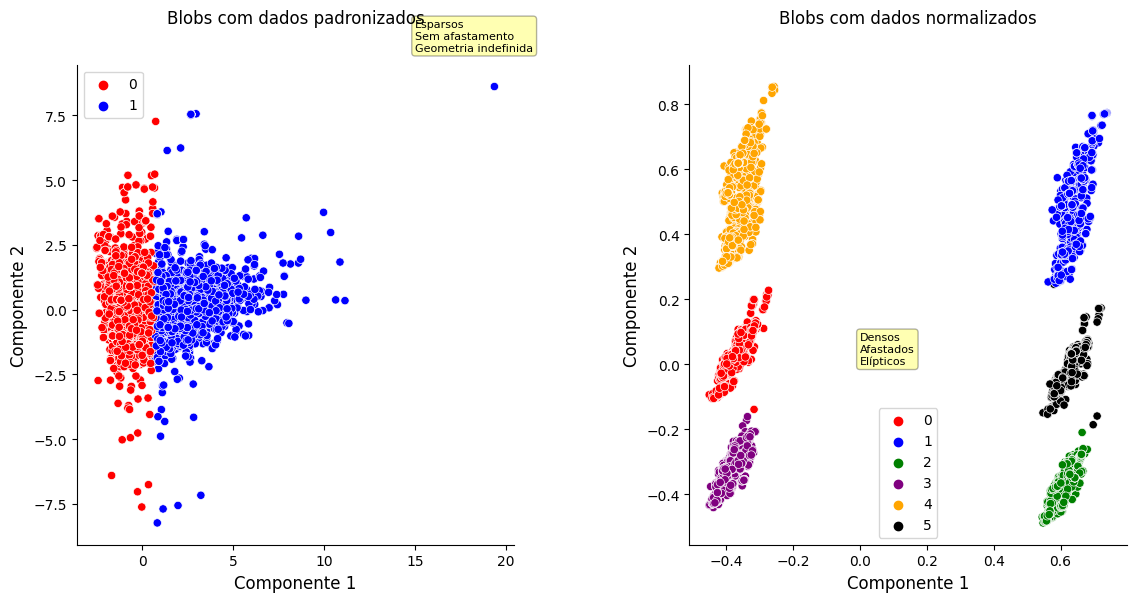

In [31]:
# Verificando os blobs para dados padronizados e normalizados

fig, ax = plt.subplots(1,2, figsize=(15,6))
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# definindo paleta de cores
cores = ['red', 'blue', 'green', 'purple', 'orange', 'black']

# Gráfico para dados padronizados
sns.scatterplot(x=pca_std[:,0],y=pca_std[:,1], ax=ax[0], hue=rotulos_std, palette=cores)

# Elementos do gráfico
ax[0].set_title('Blobs com dados padronizados', fontsize=12, pad=30)
ax[0].set_xlabel('Componente 1',fontsize=12)
ax[0].set_ylabel('Componente 2',fontsize=12)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].text(15,10,'Esparsos\nSem afastamento\nGeometria indefinida',bbox=dict(boxstyle='round',facecolor='yellow', alpha=0.3), fontsize=8)

# Gráfico para dados normalizados
sns.scatterplot(x=pca_norm[:,0],y=pca_norm[:,1], ax=ax[1], hue=rotulos_norm, palette=cores)

# Elementos do gráfico
ax[1].set_title('Blobs com dados normalizados',fontsize=12, pad=30)
ax[1].set_xlabel('Componente 1',fontsize=12)
ax[1].set_ylabel('Componente 2',fontsize=12)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

# Texto explicativo
ax[1].text(0,0,'Densos\nAfastados\nElípticos',bbox=dict(boxstyle='round',facecolor='yellow', alpha=0.3), fontsize=8)

plt.show()

In [32]:
# Verificando valor do Silhouette Score para cada conjunto de dados

print(f'''Silhouette Score:

- Dados padronizados e 2 clusters: {round (silhouette_score(pca_std, kmeans_std.labels_) ,2 ) }

- Dados normalizados e 6 clusters: {round (silhouette_score(pca_norm, kmeans_norm.labels_) ,2 ) } ''')

Silhouette Score:

- Dados padronizados e 2 clusters: 0.48

- Dados normalizados e 6 clusters: 0.76 


<br>

Vamos prosseguir com o agrupamento realizado em dados normalizados, que atingu o melhor score, igual a 0.76, numa escala de -1 a 1.

Será criada uma coluna no dataframe indicando a qual cluster aquela instância pertence.

In [33]:
# Repassando o valor do rótulo para o dataset

df_aux = df.copy()  #Dataframe auxiliar
df_aux['cluster'] = rotulos_norm

In [34]:
# Dividindo o conjunto de dados de acordo com o cluster

# Cluster 0
df_cluster0=df_aux[df_aux['cluster']==0]

# Cluster 1
df_cluster1=df_aux[df_aux['cluster']==1]

# Cluster 2
df_cluster2=df_aux[df_aux['cluster']==2]

# Cluster 3
df_cluster3=df_aux[df_aux['cluster']==3]

# Cluster 4
df_cluster4=df_aux[df_aux['cluster']==3]

# Cluster 5
df_cluster5=df_aux[df_aux['cluster']==3]

Agora, temos um conjunto de dados para cada cluster.

Ou seja, temos agrupamentos de imóveis de acordo com similaridades encontradas pelo algritmo Kmeans e podemos analisar suas características para entender como gerar insights valiosos para a tomada de decisão.

In [35]:
# Tamanho dos dados segmentados
print(f'Cluster 0: {df_cluster0.shape[0]} imóveis')
print(f'Cluster 1: {df_cluster1.shape[0]} imóveis')
print(f'Cluster 2: {df_cluster2.shape[0]} imóveis')
print(f'Cluster 3: {df_cluster3.shape[0]} imóveis')

Cluster 0: 1198 imóveis
Cluster 1: 793 imóveis
Cluster 2: 1125 imóveis
Cluster 3: 1882 imóveis


##Cluster 0

In [ ]:
# Chamando a função que cria métricas:
df_cluster0 = eficiencia(df_cluster0)

In [ ]:
# Visualizando instâncias aleatórias
df_cluster0[['ID', 'price','number_of_reviews','p/n','n/p','efic']].sample(5)

ID  price  number_of_reviews        p/n       n/p      efic
4891  4891   70.0               69.0   1.014493  0.985714  0.999896
628    628   53.0               14.0   3.785714  0.264151  0.493844
1137  1137  375.0               27.0  13.888889  0.072000  0.143257
6531  6531   90.0                6.0  15.000000  0.066667  0.132743
5101  5101  100.0               92.0   1.086957  0.920000  0.996534

In [ ]:
# Separando os imóveis de acordo com a eficiência
# Ponto de corte: 80% da eficiência acumulada
# Referência: Princípio de Pareto

top_0, resto_0 = separa_imoveis(df_cluster0, 80, 0)


  Responsáveis por 80% da eficiência global: 413 imóveis
  Quantidade total de imóveis:               1198 imóveis
  Responsáveis por 80% da eficiência global: 34.5 %
    


###Comparação TOP x Standard

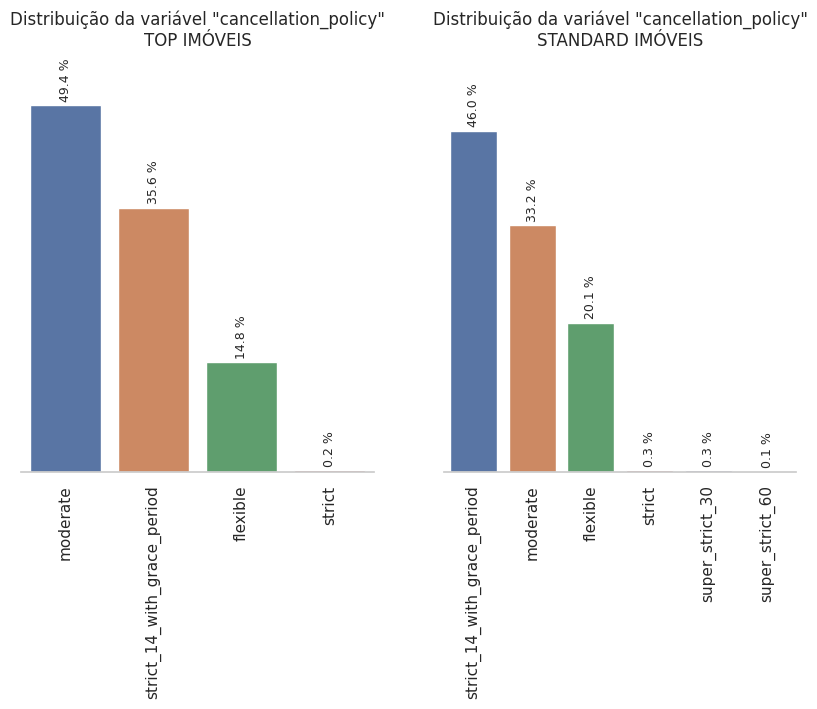

In [ ]:
# Análise do 'politica de cancelamento'
plota_cat2( top_0 , resto_0 , 'cancellation_policy', 10,5, 30, 0.5, 1)

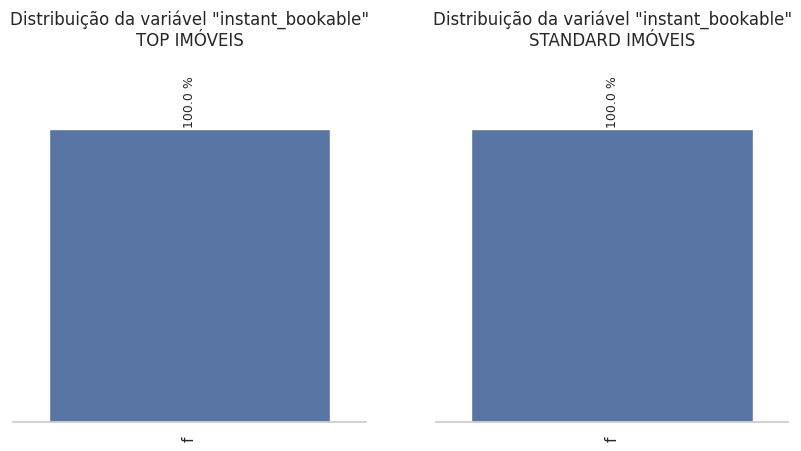

In [ ]:
# Análise de 'instantaneamente bookavel'
plota_cat2( top_0 , resto_0 , 'instant_bookable', 10,4, 50, 0.5, 1)

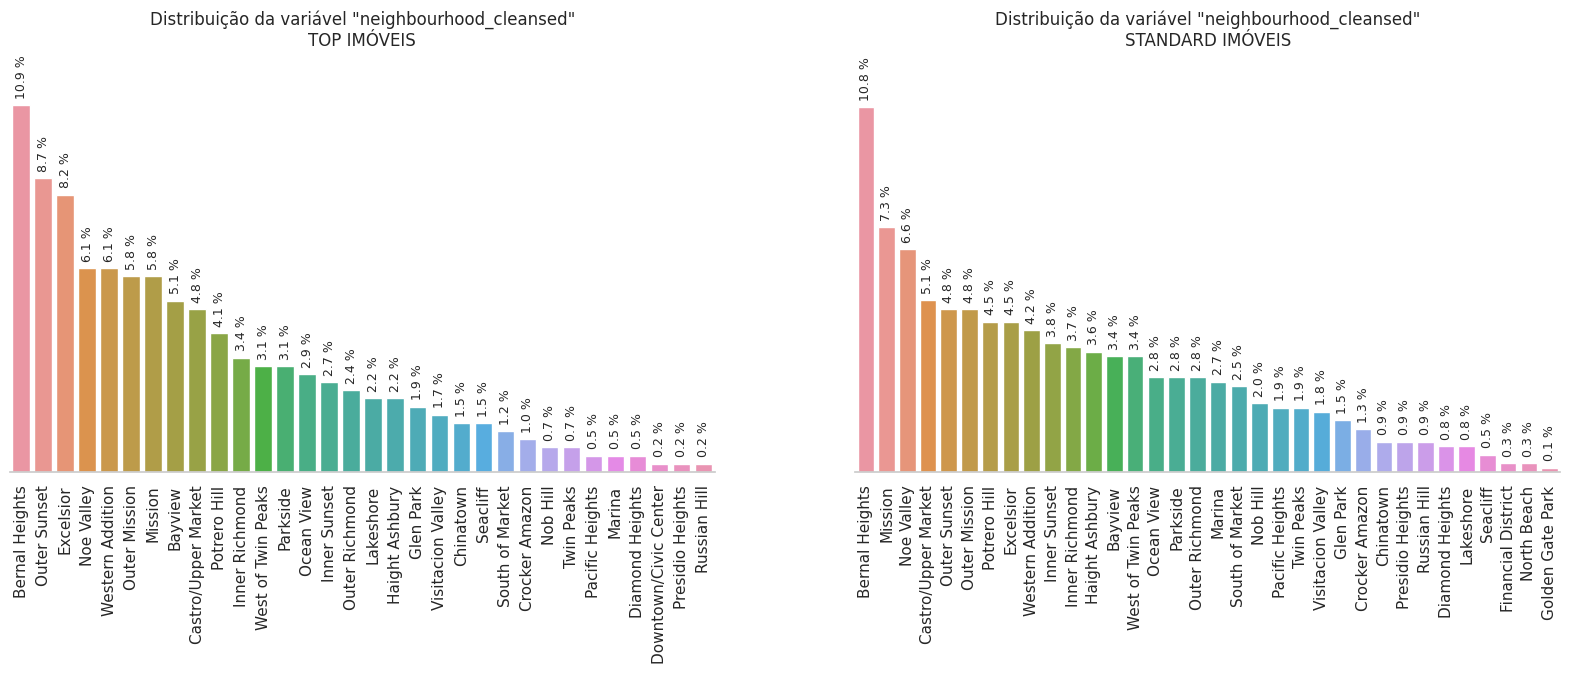

In [ ]:
# Análise das características da vizinhança
plota_cat2( top_0 , resto_0 , 'neighbourhood_cleansed', 20,5, 30, 0.2, 1)

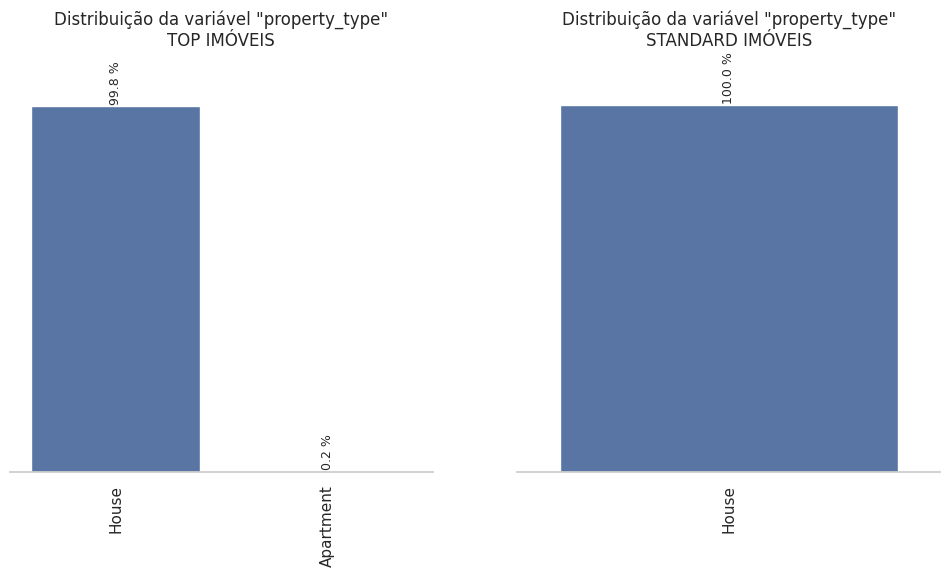

In [ ]:
# Análise do 'tipo de imóvel'
plota_cat2( top_0 , resto_0 , 'property_type', 12,5, 30, 0.5, 1)

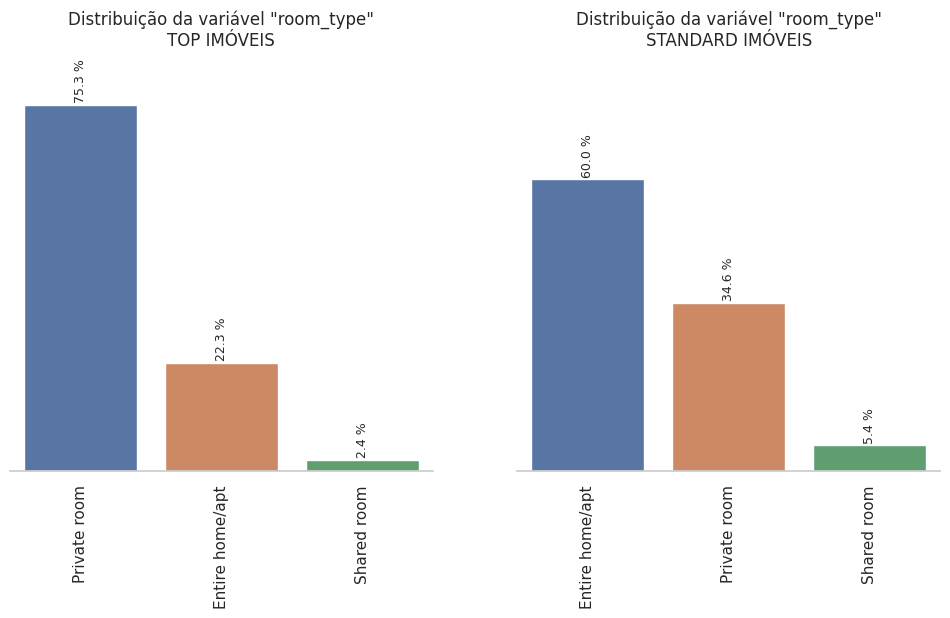

In [ ]:
# Análise do 'tipo de quarto'
plota_cat2( top_0 , resto_0 , 'room_type', 12,5, 30, 0.5, 1)

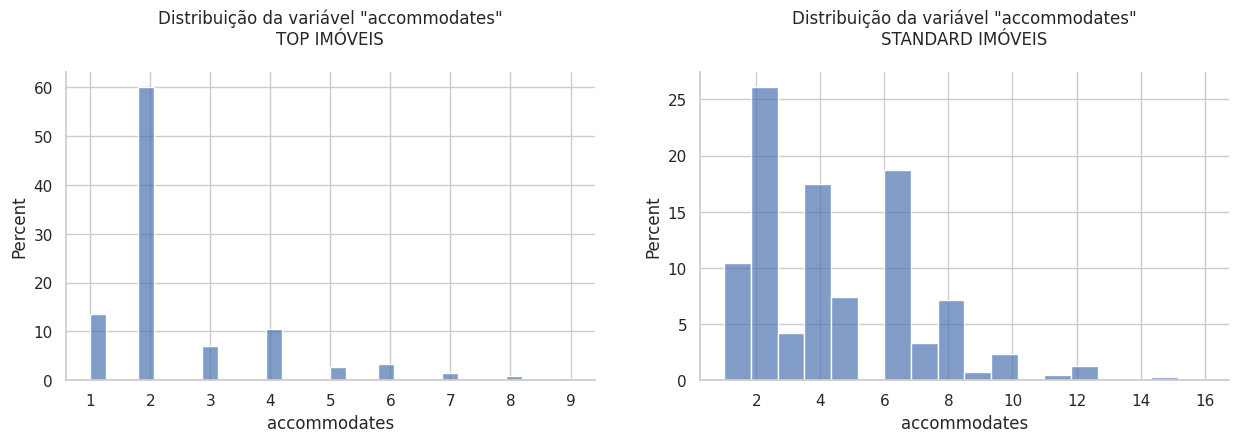

In [ ]:
# Análise do número de acomodações
plota_num2(top_0, resto_0,'accommodates',15,4,'percent',20)

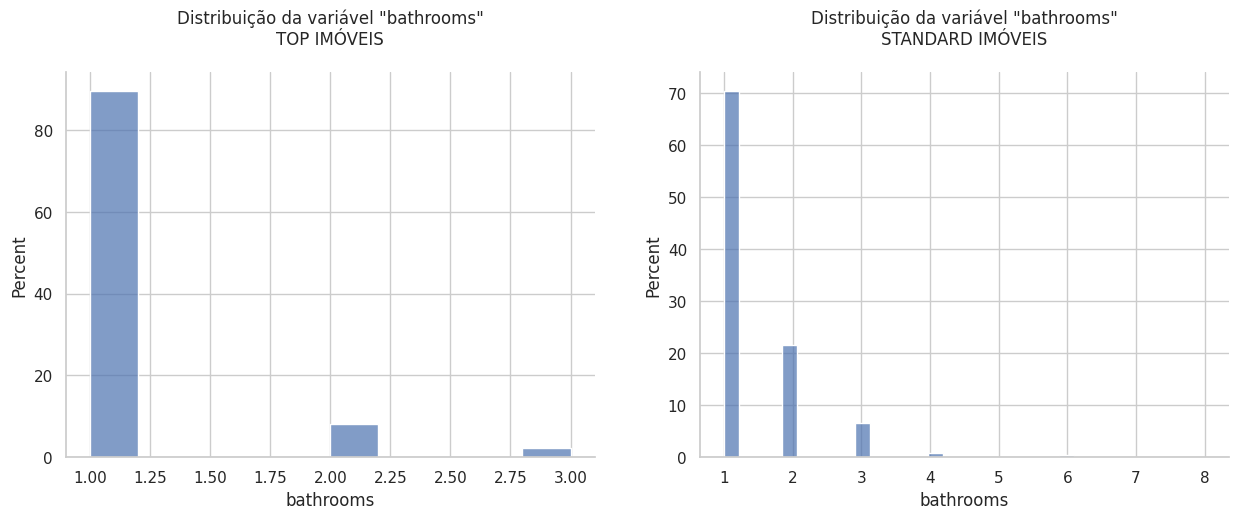

In [ ]:
# Análise da quantidade de banheiros
plota_num2(top_0, resto_0,'bathrooms',15,5,'percent',20)

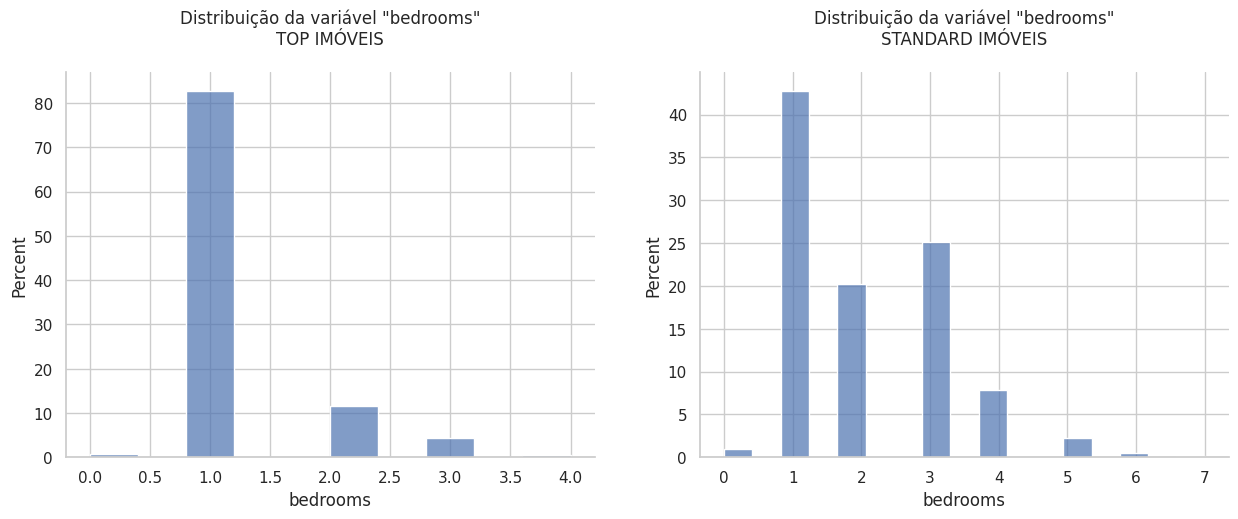

In [ ]:
# Análise da quantidade de quartos
plota_num2(top_0, resto_0,'bedrooms',15,5,'percent',20)

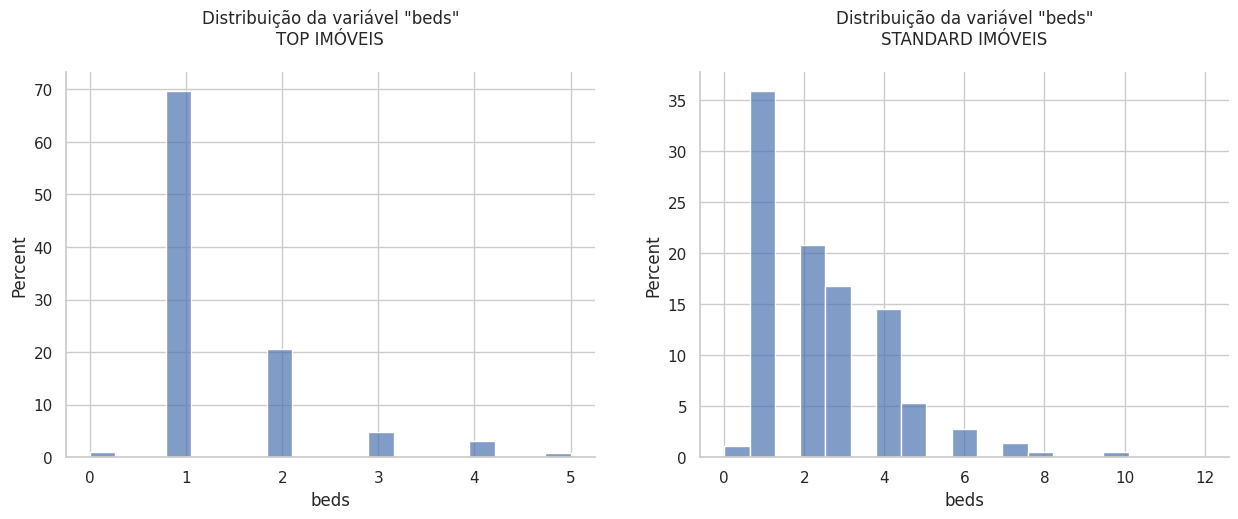

In [ ]:
# Análise da quantidade de camas
plota_num2(top_0, resto_0,'beds',15,5,'percent',20)

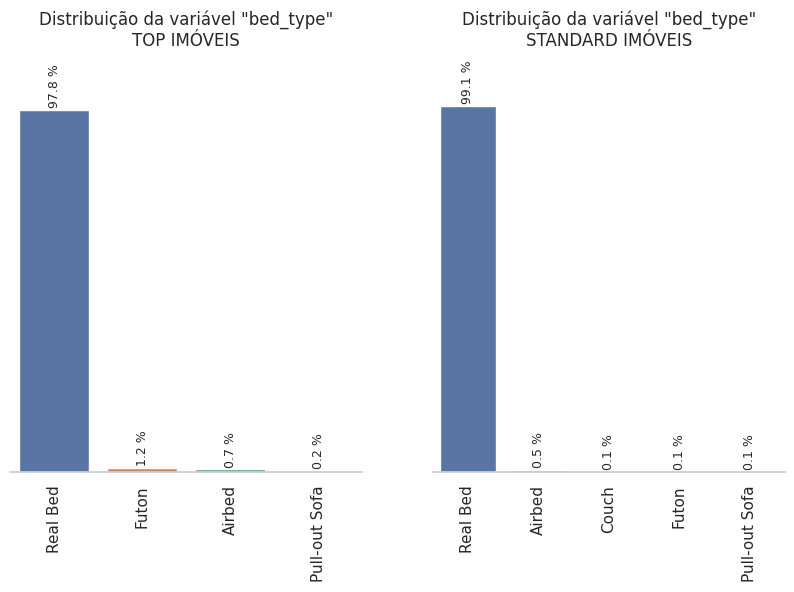

In [ ]:
# Análise do 'tipo de cama'
plota_cat2( top_0 , resto_0 , 'bed_type', 10,5, 30, 0.5, 1)

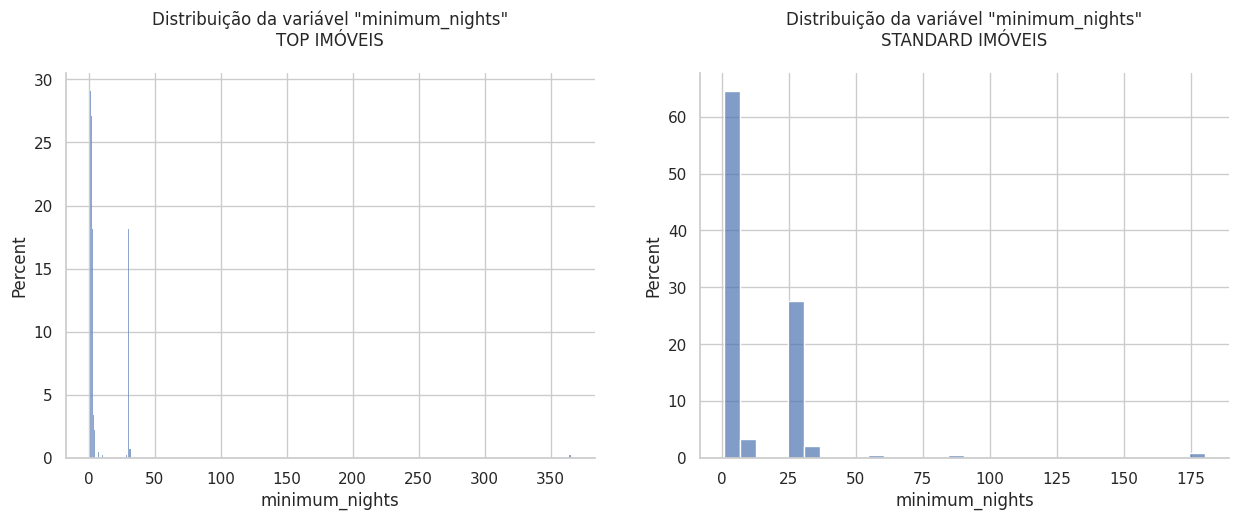

In [ ]:
# Análise do número mínimo de noites
plota_num2(top_0, resto_0,'minimum_nights',15,5,'percent',20)

###Definição de preço

In [ ]:
# Calculando novo preço para os imóveis Restantes e visualizando algumas instâncias

# Chamando o modelo de regressão
reg_0 = feature_importance(top_0, resto_0, 5 , 0.01 , 400, 2)

# Visualizando métricas
reg_0.metrics()

RMSE = $ 50.88
R² = 0.41


In [ ]:
# Extraindo os objetos do modelo de cada cluster
modelo_0 = reg_0.extract_model()
encoder_0 = reg_0.extract_encoder()
scaler_0 = reg_0.extract_scaler()

In [ ]:
# Chamando o método de novas predições
novo_0 = reg_0.predict_price()

# Criando planilha com a sugestão de preço dos novos imóveis
novo_0.to_excel(f'Novos preços - Cluster 0.xlsx', index=False)

In [ ]:
# Visualizando algumas instâncias
novo_0[['ID','price','new_price']].sample(5)

ID  price  new_price
489  3466  325.0      221.8
715   100   43.0       59.9
591  6092  120.0      116.1
588  1716  325.0      243.4
307  2953  285.0      214.3

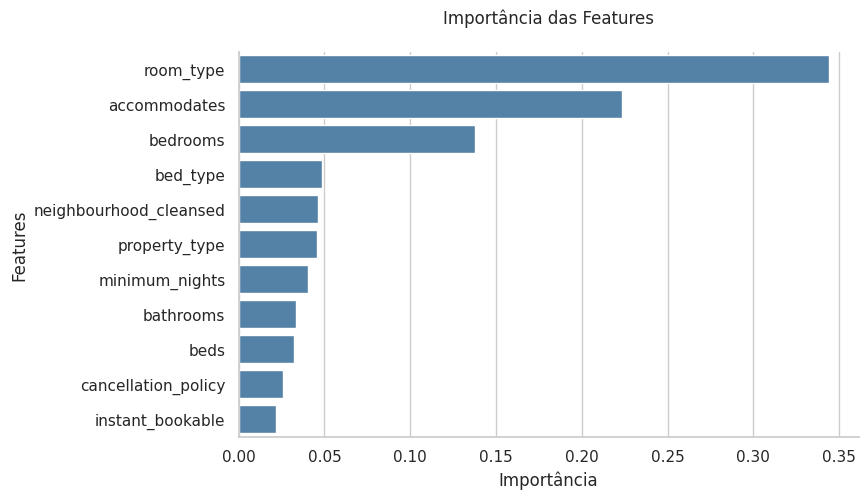

In [ ]:
# Exibindo o gráfico de feature importance
reg_0.feature_importance_plot()

##Cluster 1

In [ ]:
# Chamando a função que cria métricas:
df_cluster1 = eficiencia(df_cluster1)

In [ ]:
# Visualizando instâncias aleatórias
df_cluster1[['ID', 'price','number_of_reviews','p/n','n/p','efic']].sample(5)

ID  price  number_of_reviews         p/n       n/p      efic
455    455  160.0              141.0    1.134752  0.881250  0.992063
6944  6944   19.0                0.1  190.000000  0.005263  0.010526
3470  3470  100.0                5.0   20.000000  0.050000  0.099751
4049  4049  200.0               20.0   10.000000  0.100000  0.198020
4870  4870   69.0               16.0    4.312500  0.231884  0.440104

In [ ]:
# Separando os imóveis de acordo com a eficiência
# Ponto de corte: 80% da eficiência acumulada
# Referência: Princípio de Pareto

top_1, resto_1 = separa_imoveis(df_cluster1, 80, 0)


  Responsáveis por 80% da eficiência global: 267 imóveis
  Quantidade total de imóveis:               793 imóveis
  Responsáveis por 80% da eficiência global: 33.7 %
    


###Comparação TOP x Standard

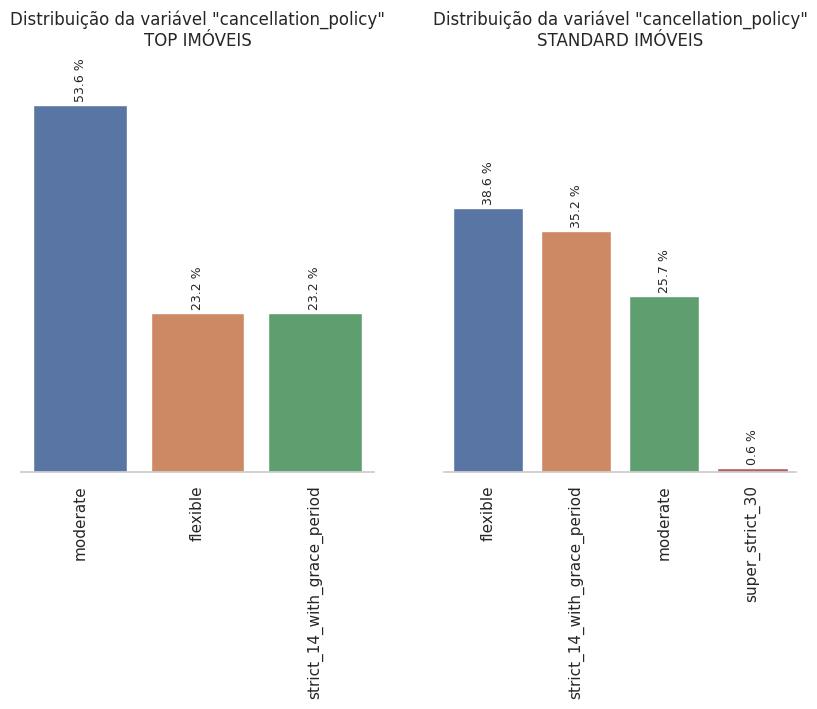

In [ ]:
# Análise do 'politica de cancelamento'
plota_cat2( top_1 , resto_1 , 'cancellation_policy', 10,5, 30, 0.5, 1)

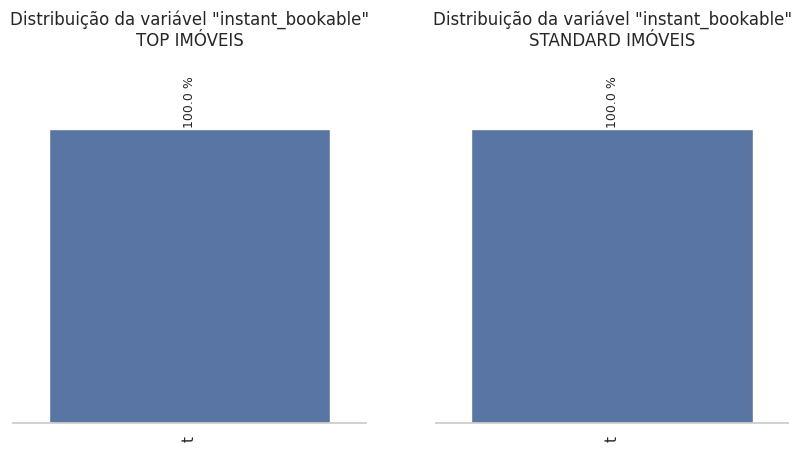

In [ ]:
# Análise de 'instantaneamente bookavel'
plota_cat2( top_1 , resto_1 , 'instant_bookable', 10,4, 50, 0.5, 1)

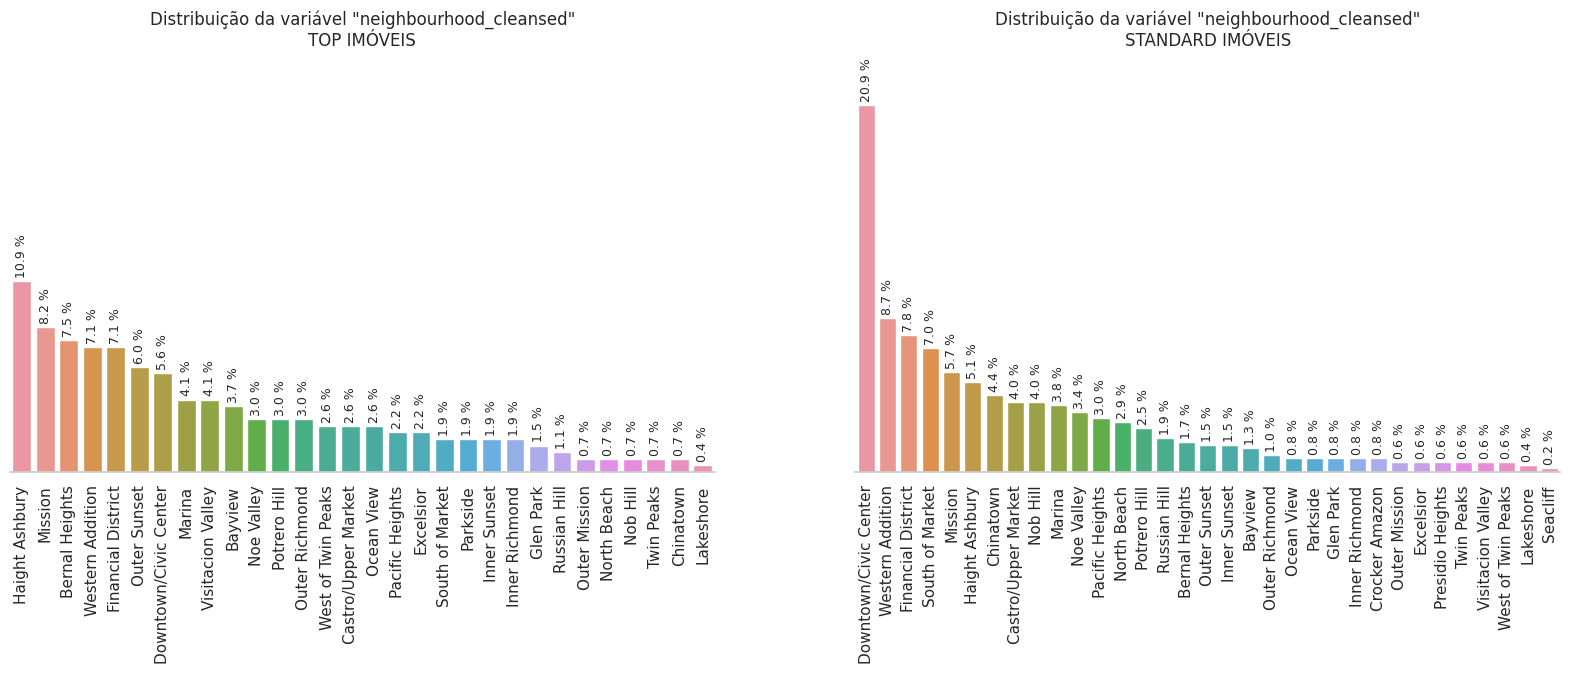

In [ ]:
# Análise das características da vizinhança
plota_cat2( top_1 , resto_1 , 'neighbourhood_cleansed', 20,5, 30, 0.2, 1)

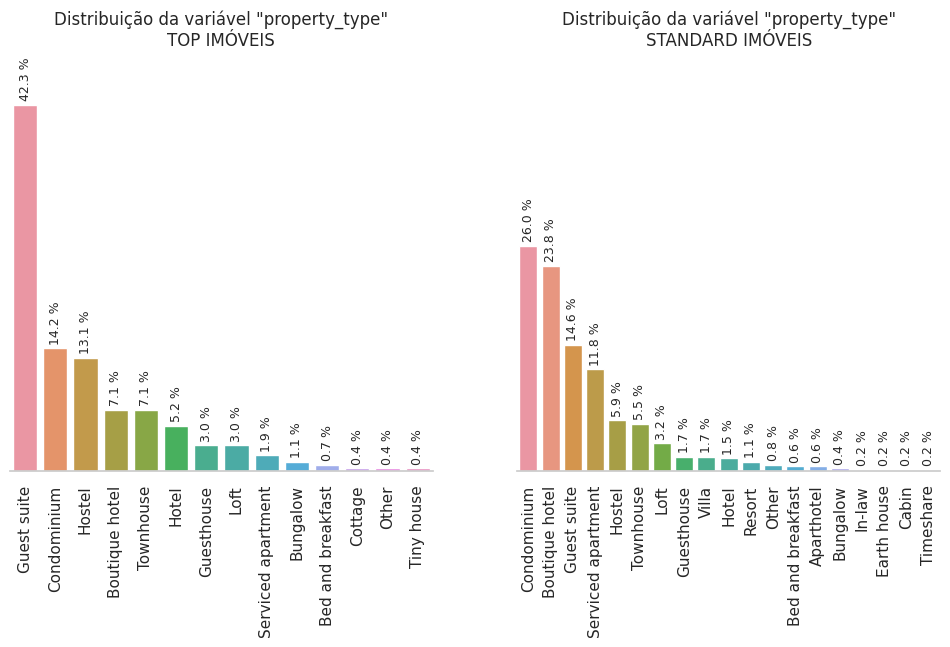

In [ ]:
# Análise do 'tipo de imóvel'
plota_cat2( top_1 , resto_1 , 'property_type', 12,5, 30, 0.5, 1)

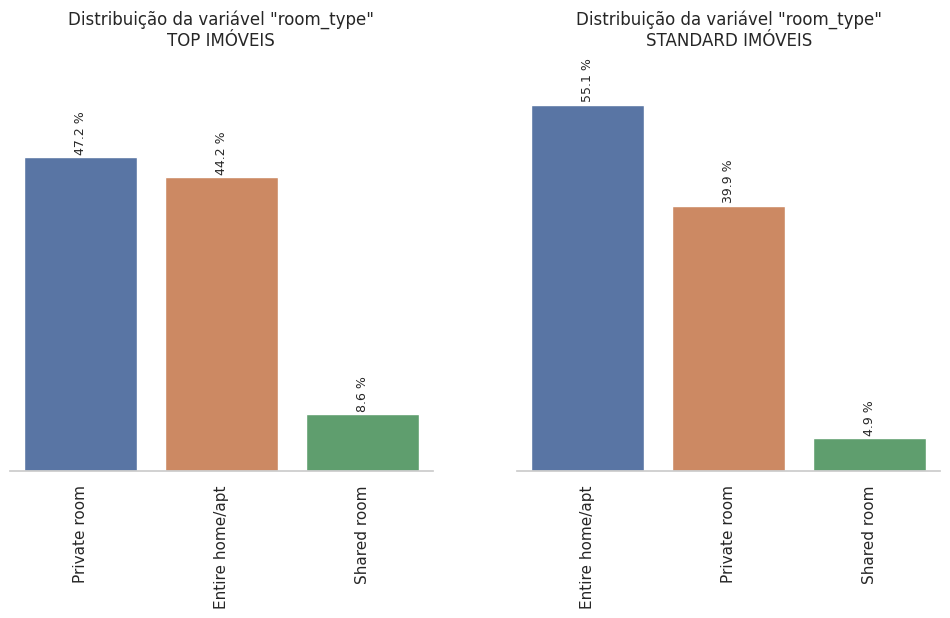

In [ ]:
# Análise do 'tipo de quarto'
plota_cat2( top_1 , resto_1 , 'room_type', 12,5, 30, 0.5, 1)

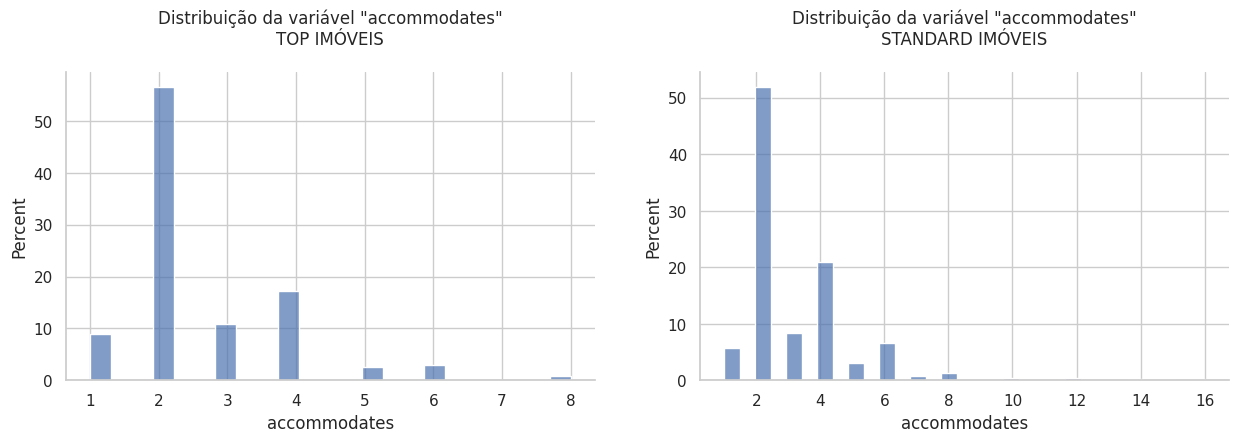

In [ ]:
# Análise do número de acomodações
plota_num2(top_1, resto_1,'accommodates',15,4,'percent',20)

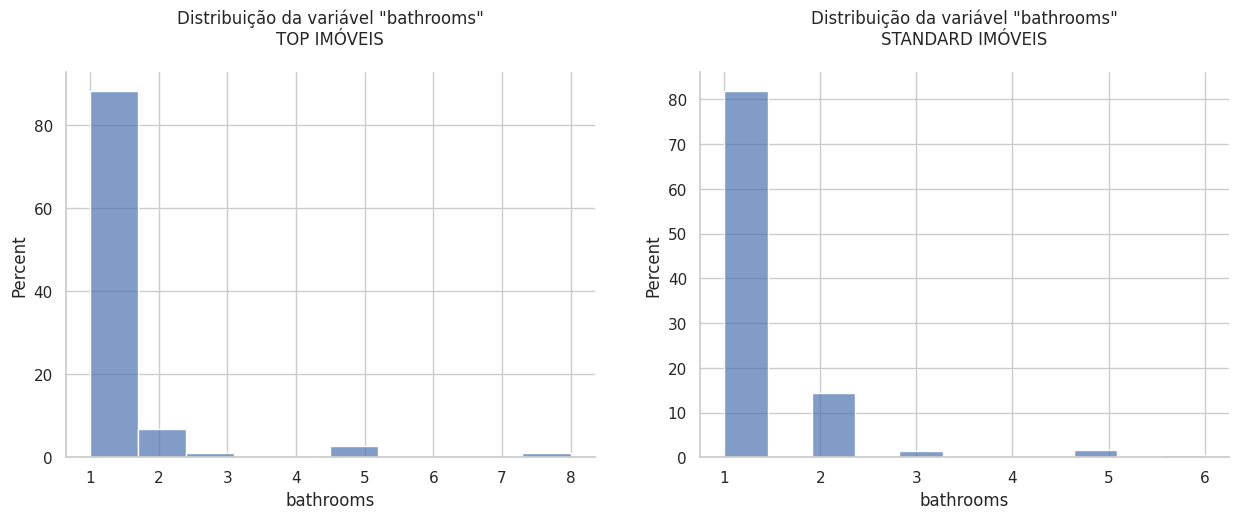

In [ ]:
# Análise da quantidade de banheiros
plota_num2(top_1, resto_1,'bathrooms',15,5,'percent',20)

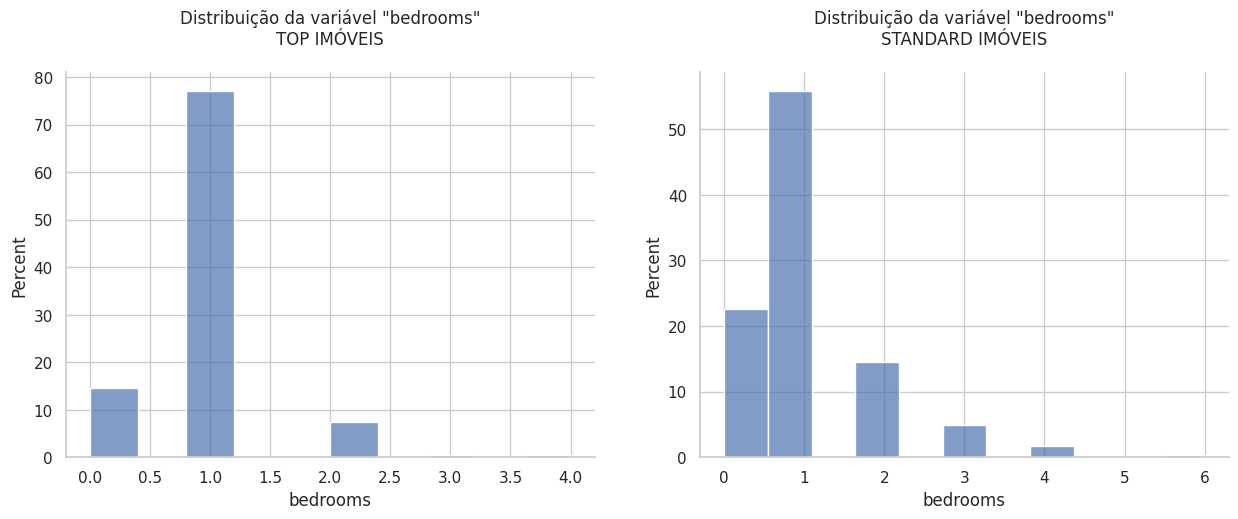

In [ ]:
# Análise da quantidade de quartos
plota_num2(top_1, resto_1,'bedrooms',15,5,'percent',20)

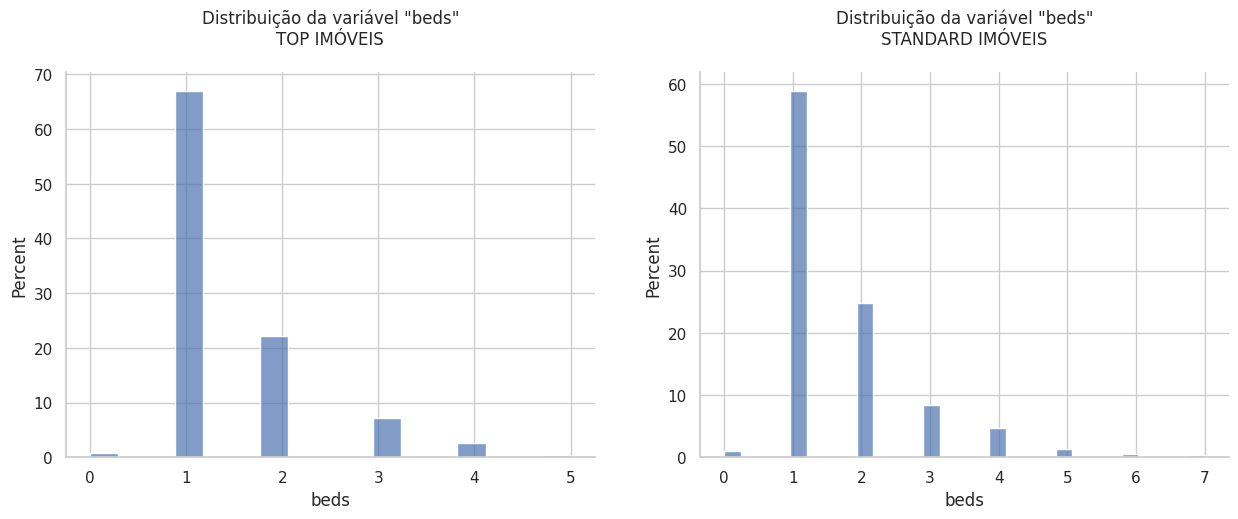

In [ ]:
# Análise da quantidade de camas
plota_num2(top_1, resto_1,'beds',15,5,'percent',20)

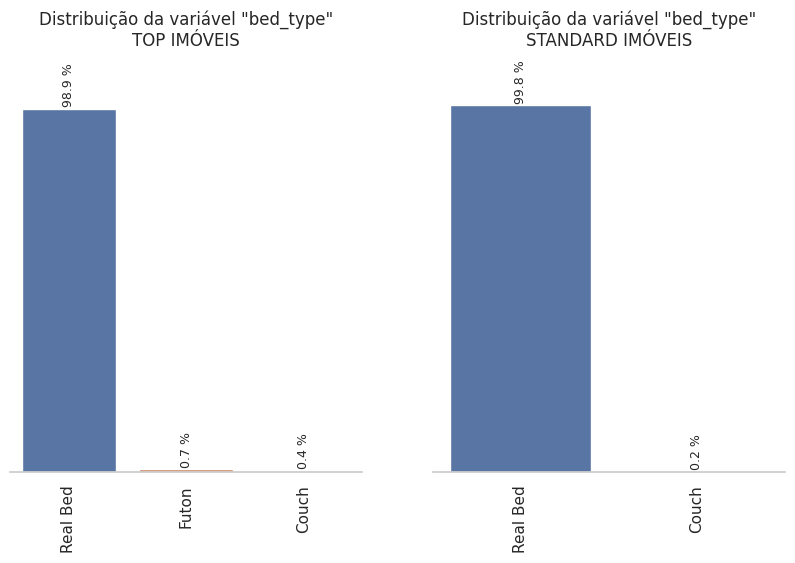

In [ ]:
# Análise do 'tipo de cama'
plota_cat2( top_1 , resto_1 , 'bed_type', 10,5, 30, 0.5, 1)

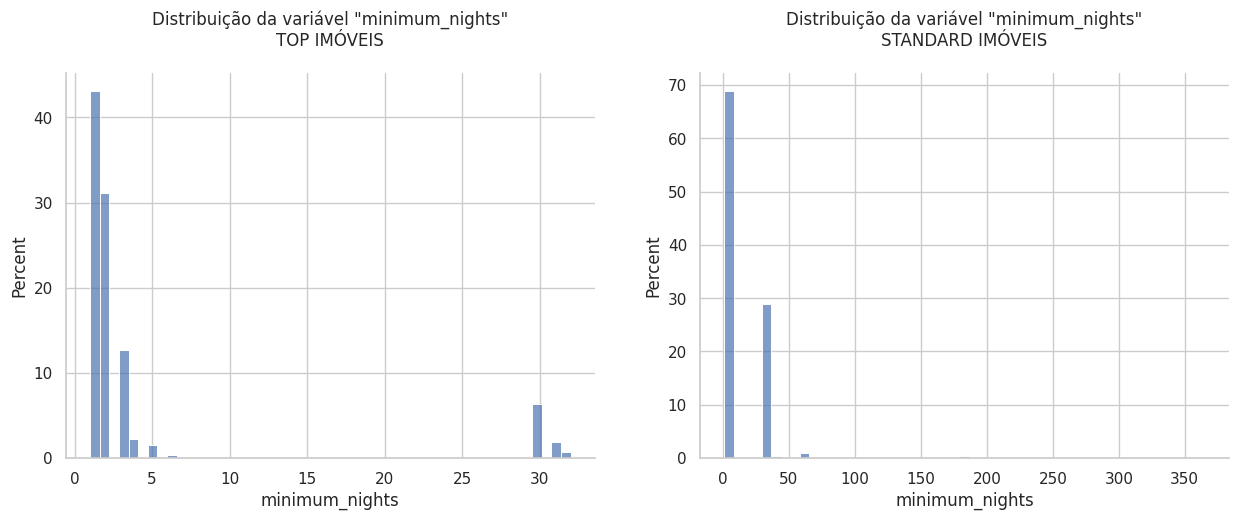

In [ ]:
# Análise do número mínimo de noites
plota_num2(top_1, resto_1,'minimum_nights',15,5,'percent',20)

###Definição de preço

In [ ]:
# Calculando novo preço para os imóveis Restantes e visualizando algumas instâncias

# Chamando o modelo de regressão
reg_1 = feature_importance(top_1, resto_1, 5 , 0.01 , 500, 2)

# Visualizando métricas
reg_1.metrics()

RMSE = $ 50.34
R² = 0.22


In [ ]:
# Salvando o modelo de regressão treinado nos dados do cluster
modelo_1 = reg_1.extract_model()
encoder_1 = reg_1.extract_encoder()
scaler_1 = reg_1.extract_scaler()

In [ ]:
# Chamando o método de novas predições
novo_1 = reg_1.predict_price()

# Criando planilha com a sugestão de preço dos novos imóveis
novo_1.to_excel(f'Novos preços - Cluster 1.xlsx', index=False)

In [ ]:
# Visualizando algumas instâncias
novo_1[['ID','price','new_price']].sample(5)

ID  price  new_price
418  6036  320.0      105.7
245  5298  185.0      178.8
165  6213  200.0      122.7
361  6108   59.0       64.6
246  4044  200.0      147.3

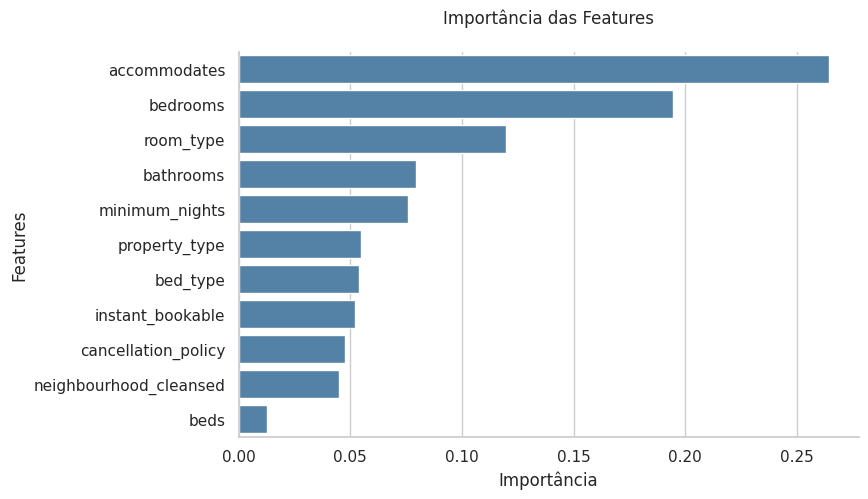

In [ ]:
# Exibindo o gráfico de feature importance
reg_1.feature_importance_plot()

##Cluster 2

In [ ]:
# Chamando a função que cria métricas:
df_cluster2 = eficiencia(df_cluster2)

In [ ]:
# Visualizando instâncias aleatórias
df_cluster2[['ID', 'price','number_of_reviews','p/n','n/p','efic']].sample(5)

ID  price  number_of_reviews          p/n       n/p      efic
5872  5872  350.0                2.0   175.000000  0.005714  0.011428
2069  2069  149.0              112.0     1.330357  0.751678  0.960599
5307  5307  164.0                0.1  1640.000000  0.000610  0.001220
5864  5864  131.0               11.0    11.909091  0.083969  0.166763
6313  6313  164.0                0.1  1640.000000  0.000610  0.001220

In [ ]:
# Separando os imóveis de acordo com a eficiência
# Ponto de corte: 80% da eficiência acumulada
# Referência: Princípio de Pareto

top_2, resto_2 = separa_imoveis(df_cluster2, 80, 0)


  Responsáveis por 80% da eficiência global: 278 imóveis
  Quantidade total de imóveis:               1125 imóveis
  Responsáveis por 80% da eficiência global: 24.7 %
    


###Comparação TOP x Standard

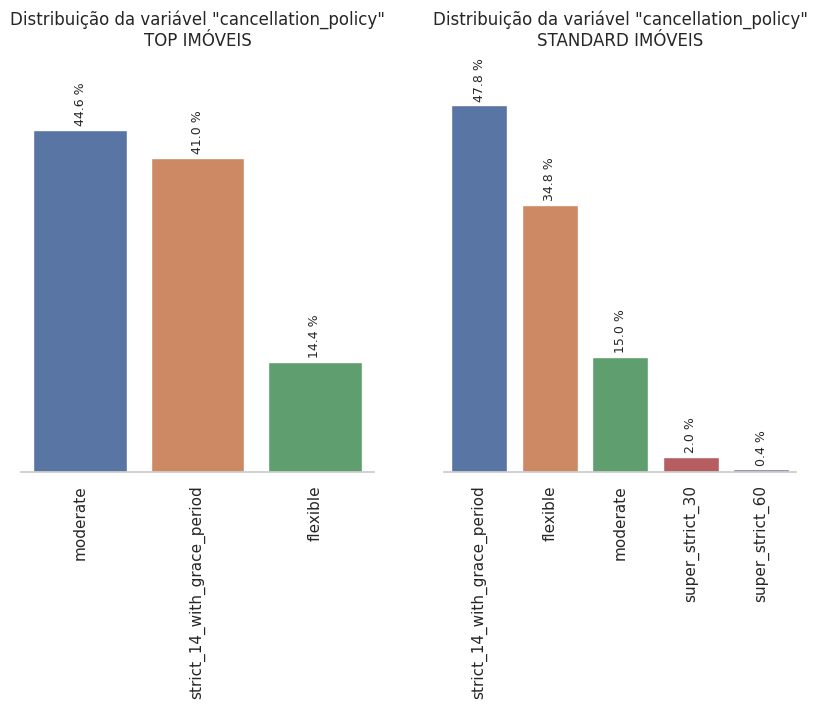

In [ ]:
# Análise do 'politica de cancelamento'
plota_cat2( top_2 , resto_2 , 'cancellation_policy', 10,5, 30, 0.5, 1)

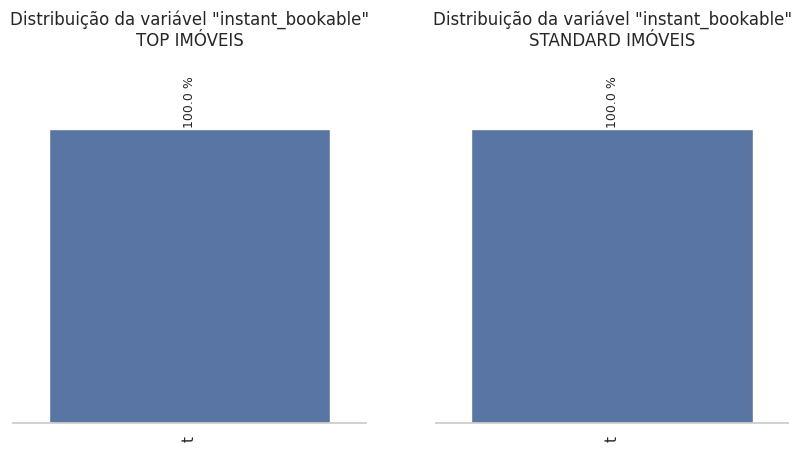

In [ ]:
# Análise de 'instantaneamente bookavel'
plota_cat2( top_2 , resto_2 , 'instant_bookable', 10,4, 50, 0.5, 1)

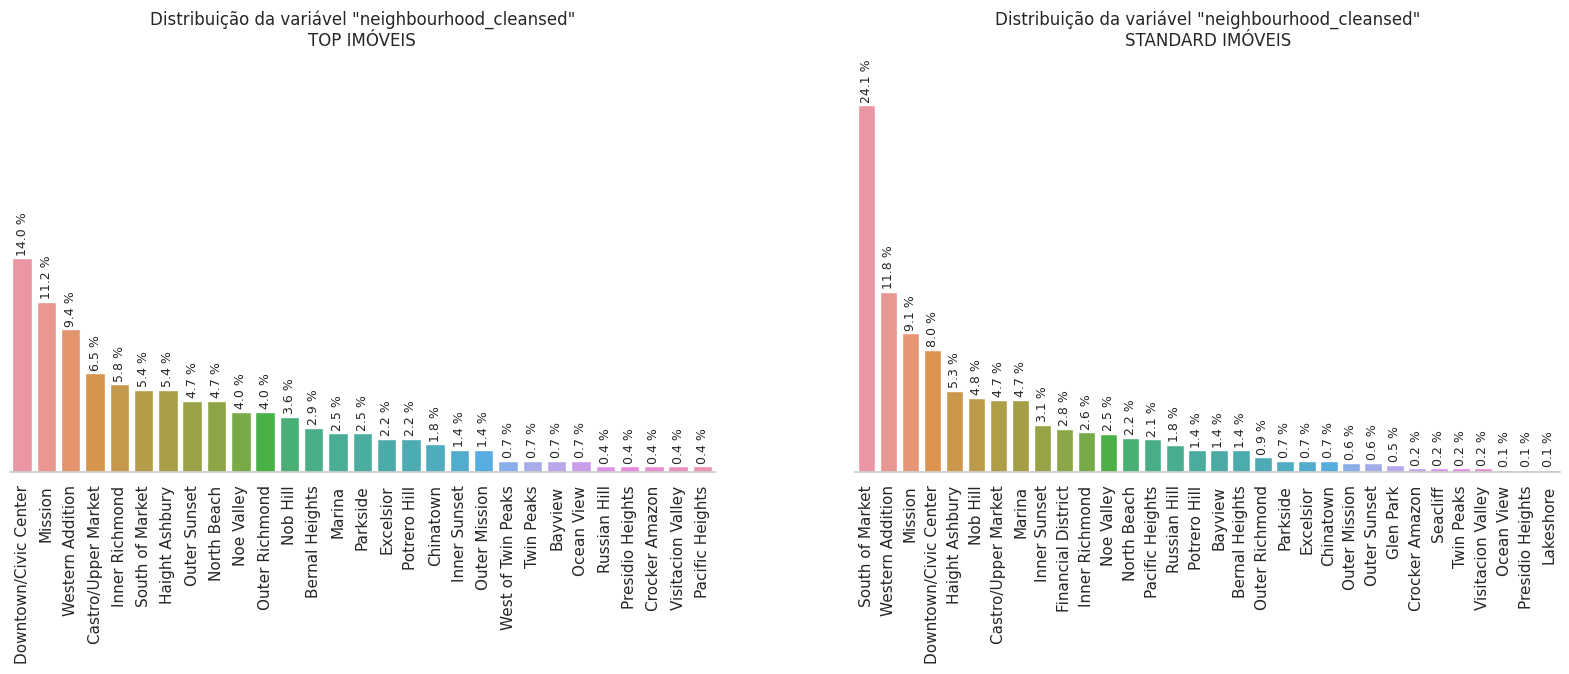

In [ ]:
# Análise das características da vizinhança
plota_cat2( top_2 , resto_2 , 'neighbourhood_cleansed', 20,5, 30, 0.2, 1)

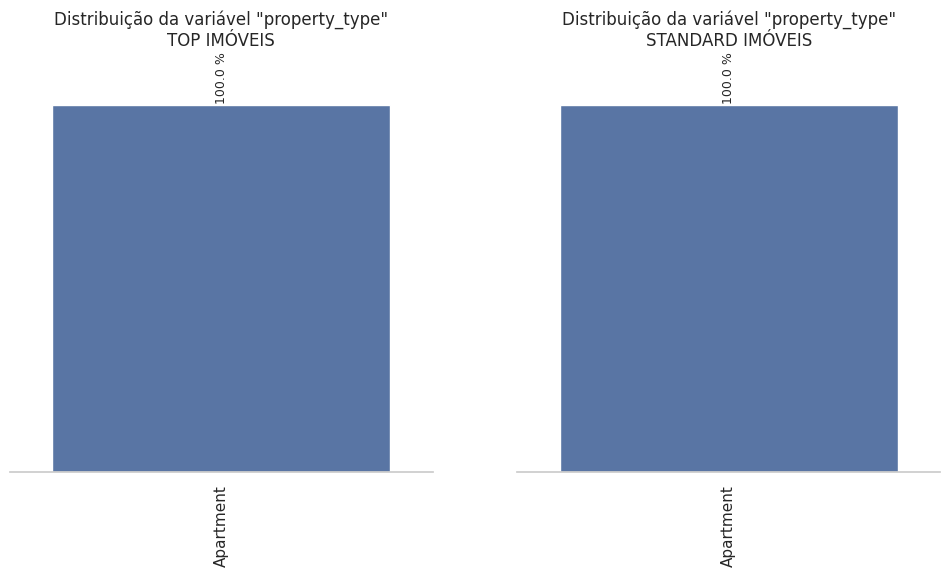

In [ ]:
# Análise do 'tipo de imóvel'
plota_cat2( top_2 , resto_2 , 'property_type', 12,5, 30, 0.5, 1)

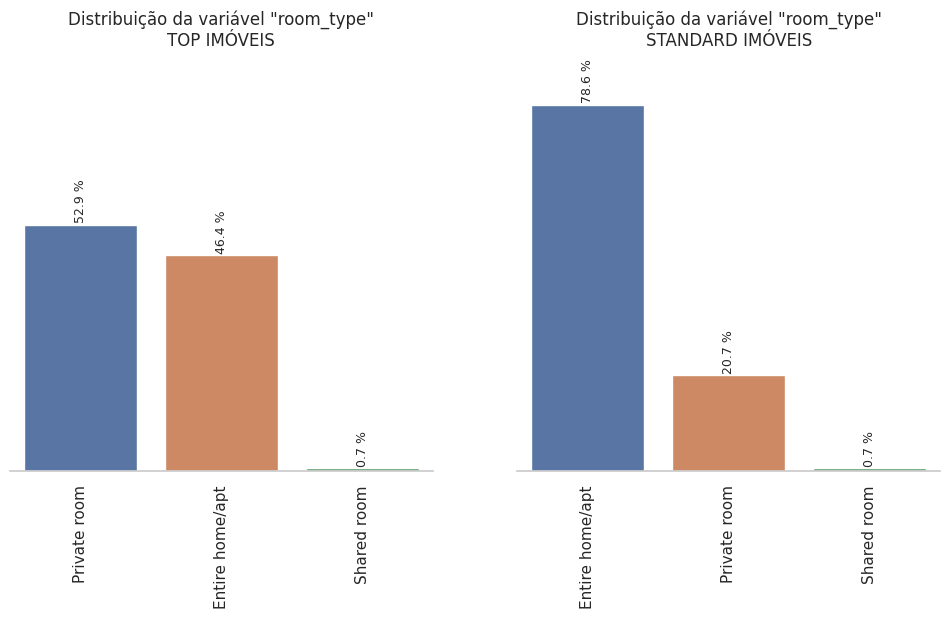

In [ ]:
# Análise do 'tipo de quarto'
plota_cat2( top_2 , resto_2 , 'room_type', 12,5, 30, 0.5, 1)

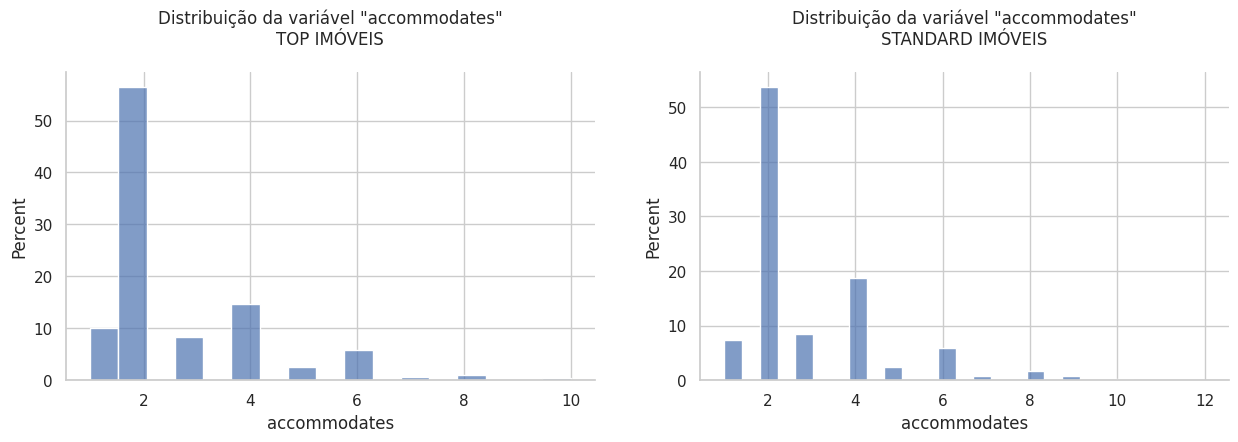

In [ ]:
# Análise do número de acomodações
plota_num2(top_2, resto_2,'accommodates',15,4,'percent',20)

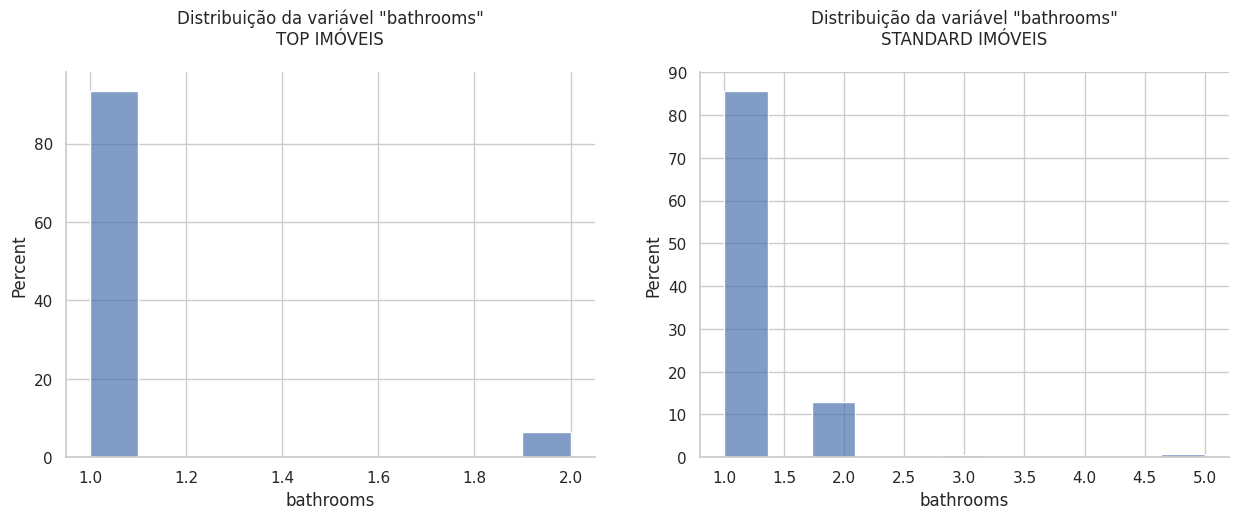

In [ ]:
# Análise da quantidade de banheiros
plota_num2(top_2, resto_2,'bathrooms',15,5,'percent',20)

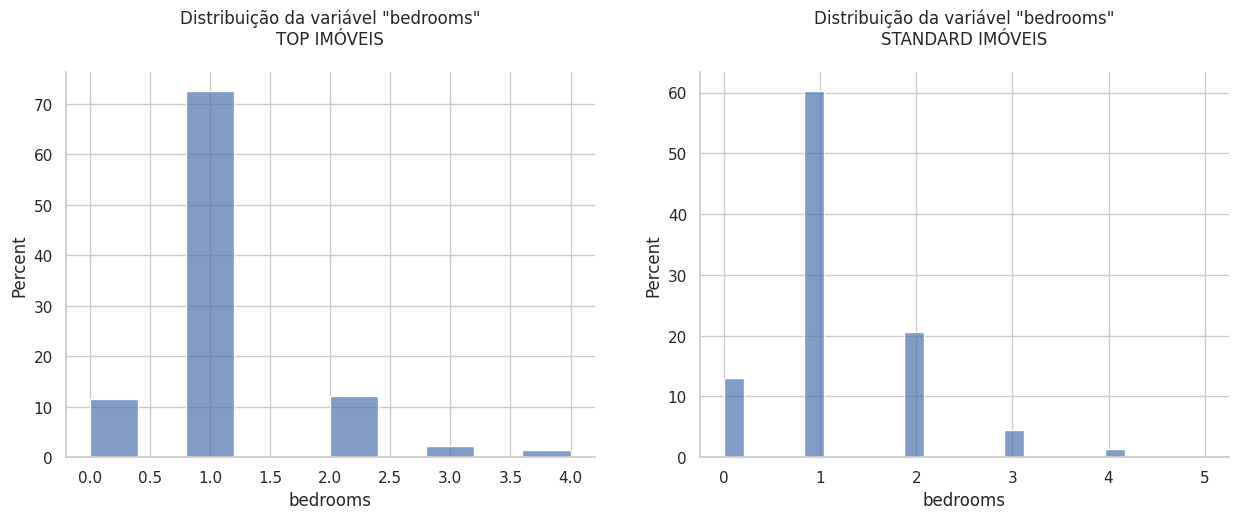

In [ ]:
# Análise da quantidade de quartos
plota_num2(top_2, resto_2,'bedrooms',15,5,'percent',20)

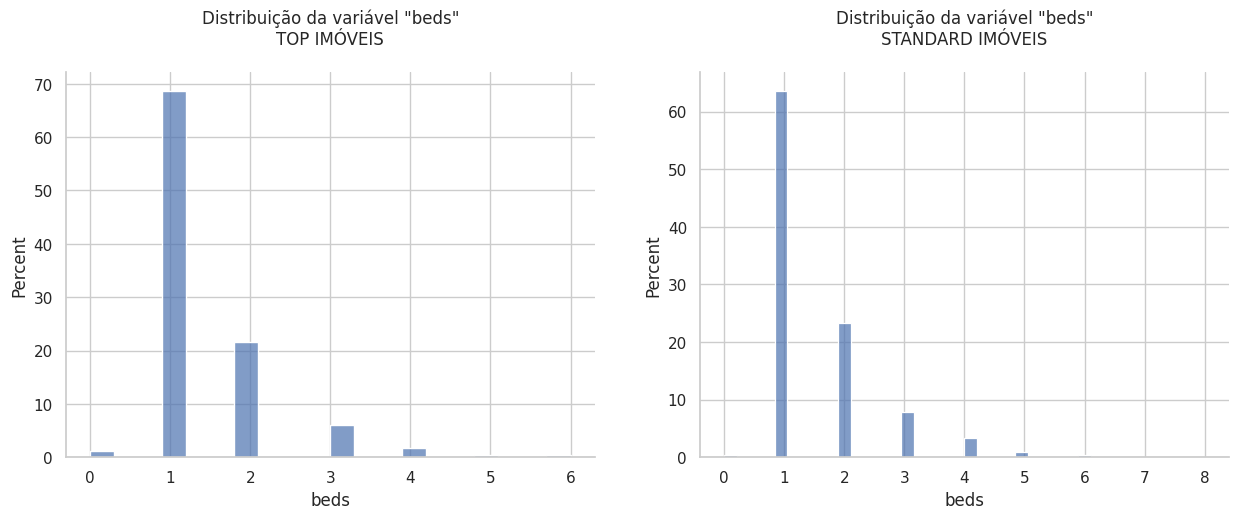

In [ ]:
# Análise da quantidade de camas
plota_num2(top_2, resto_2,'beds',15,5,'percent',20)

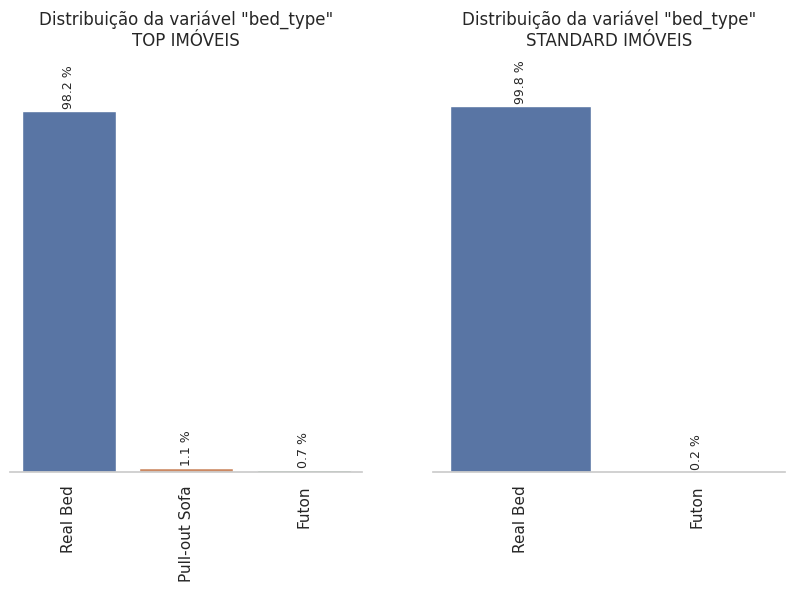

In [ ]:
# Análise do 'tipo de cama'
plota_cat2( top_2 , resto_2 , 'bed_type', 10,5, 30, 0.5, 1)

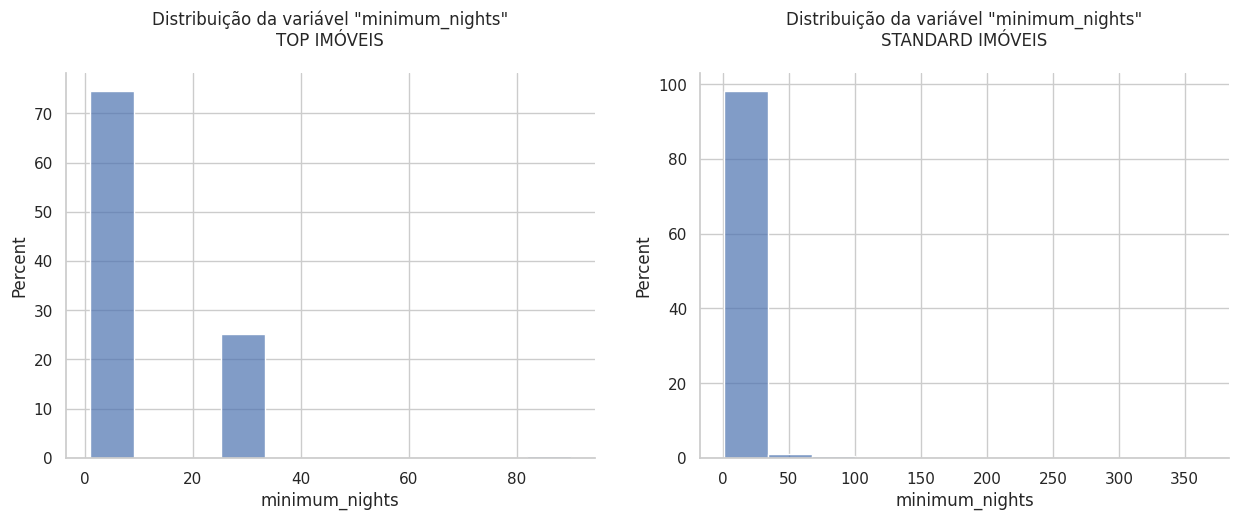

In [ ]:
# Análise do número mínimo de noites
plota_num2(top_2, resto_2,'minimum_nights',15,5,'percent',20)

###Definição de preço

In [ ]:
# Calculando novo preço para os imóveis Restantes e visualizando algumas instâncias

# Chamando o modelo de regressão
reg_2 = feature_importance(top_2, resto_2, 5 , 0.01 , 500, 2)

# Visualizando métricas
reg_2.metrics()

RMSE = $ 46.39
R² = 0.32


In [ ]:
# Salvando o modelo de regressão treinado nos dados do cluster
modelo_2 = reg_2.extract_model()
encoder_2 = reg_2.extract_encoder()
scaler_2 = reg_2.extract_scaler()

In [ ]:
# Chamando o método de novas predições
novo_2 = reg_2.predict_price()

# Criando planilha com a sugestão de preço dos novos imóveis
novo_2.to_excel(f'Novos preços - Cluster 2.xlsx', index=False)

In [ ]:
# Visualizando algumas instâncias
novo_2[['ID','price','new_price']].sample(5)

ID   price  new_price
603  6308   147.0      135.5
33   2514   120.0       83.7
484  1217   170.0      215.0
844  5258    88.0      149.5
86   6037  3800.0      109.3

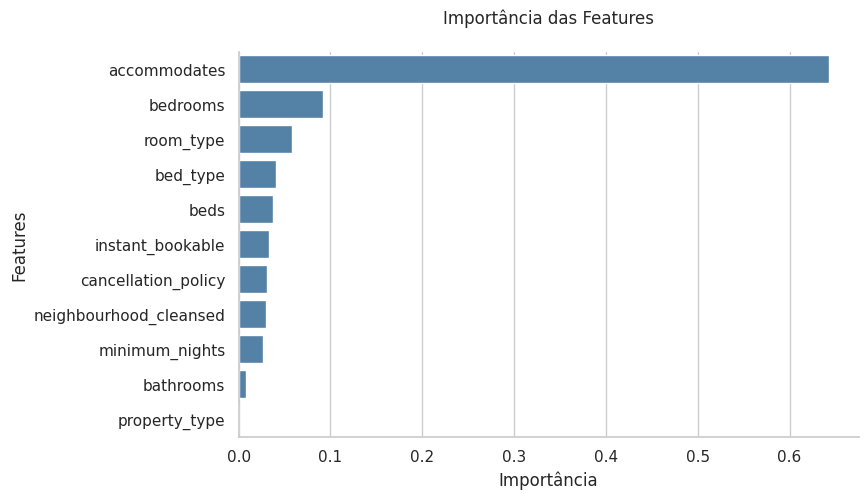

In [ ]:
# Exibindo o gráfico de feature importance
reg_2.feature_importance_plot()

##Cluster 3

In [ ]:
# Chamando a função que cria métricas:
df_cluster3 = eficiencia(df_cluster3)

In [ ]:
# Visualizando instâncias aleatórias
df_cluster3[['ID', 'price','number_of_reviews','p/n','n/p','efic']].sample(5)

ID  price  number_of_reviews          p/n       n/p      efic
3346  3346  114.0                7.0    16.285714  0.061404  0.122346
4894  4894  189.0                0.1  1890.000000  0.000529  0.001058
5672  5672  139.0                0.1  1390.000000  0.000719  0.001439
4625  4625  130.0                1.0   130.000000  0.007692  0.015384
635    635   57.0               13.0     4.384615  0.228070  0.433587

In [ ]:
# Separando os imóveis de acordo com a eficiência
# Ponto de corte: 80% da eficiência acumulada
# Referência: Princípio de Pareto

top_3, resto_3 = separa_imoveis(df_cluster3, 80, 0)


  Responsáveis por 80% da eficiência global: 547 imóveis
  Quantidade total de imóveis:               1882 imóveis
  Responsáveis por 80% da eficiência global: 29.1 %
    


###Comparação TOP x Standard

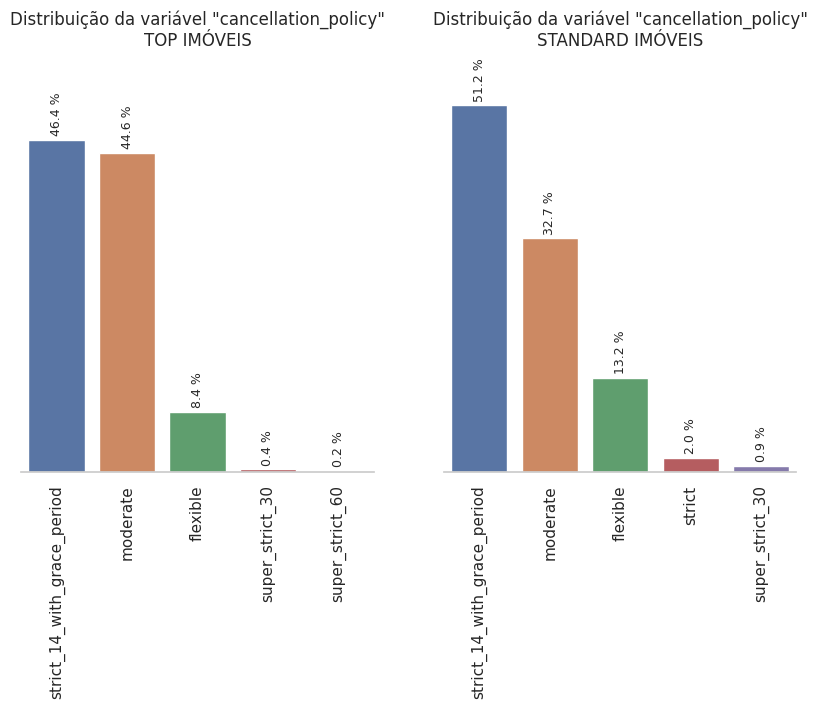

In [ ]:
# Análise do 'politica de cancelamento'
plota_cat2( top_3 , resto_3 , 'cancellation_policy', 10,5, 30, 0.5, 1)

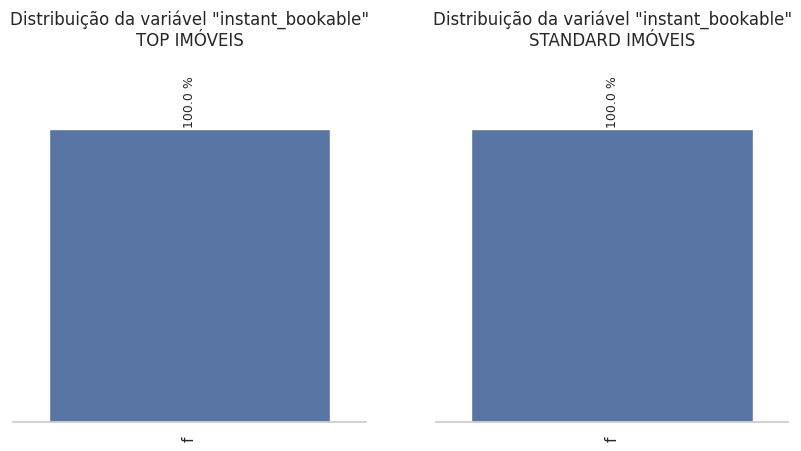

In [ ]:
# Análise de 'instantaneamente bookavel'
plota_cat2( top_3 , resto_3 , 'instant_bookable', 10,4, 50, 0.5, 1)

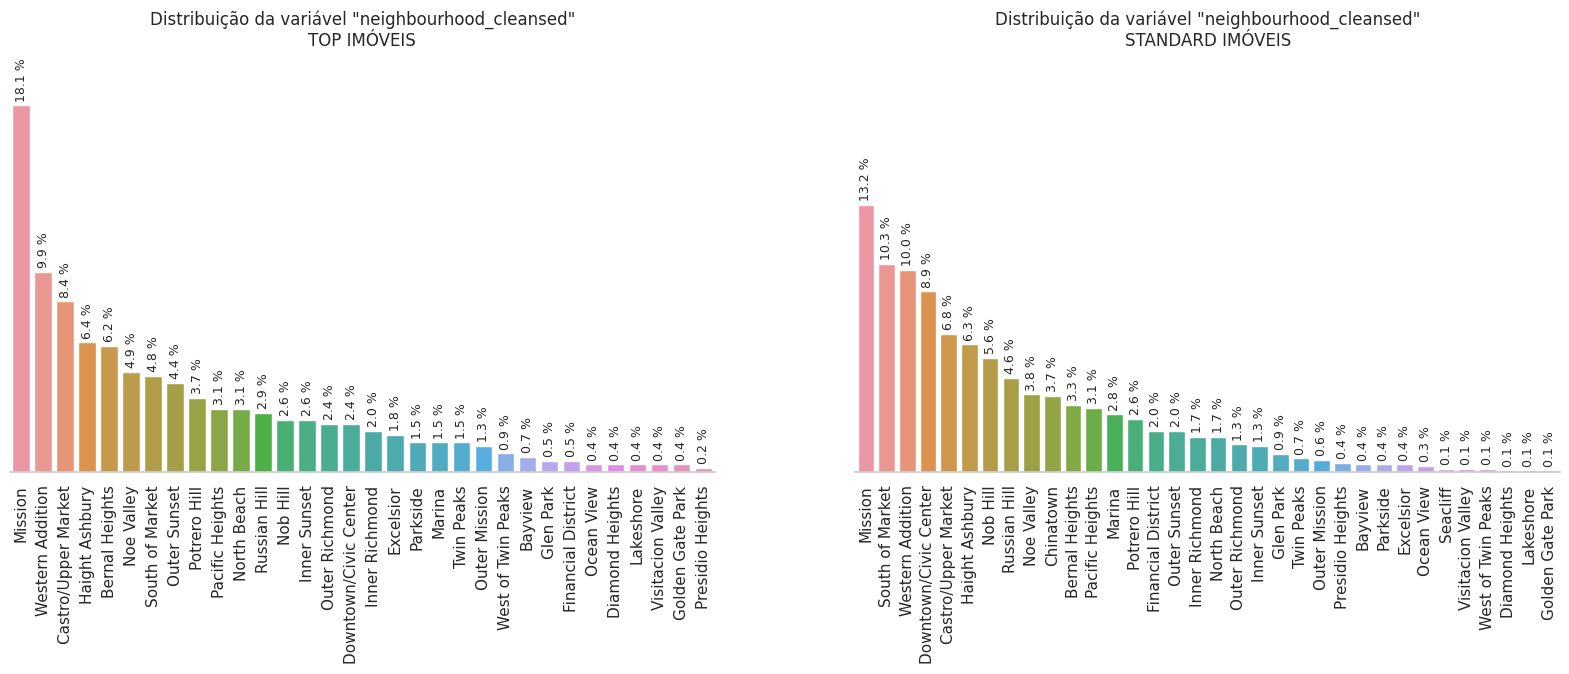

In [ ]:
# Análise das características da vizinhança
plota_cat2( top_3 , resto_3 , 'neighbourhood_cleansed', 20,5, 30, 0.2, 1)

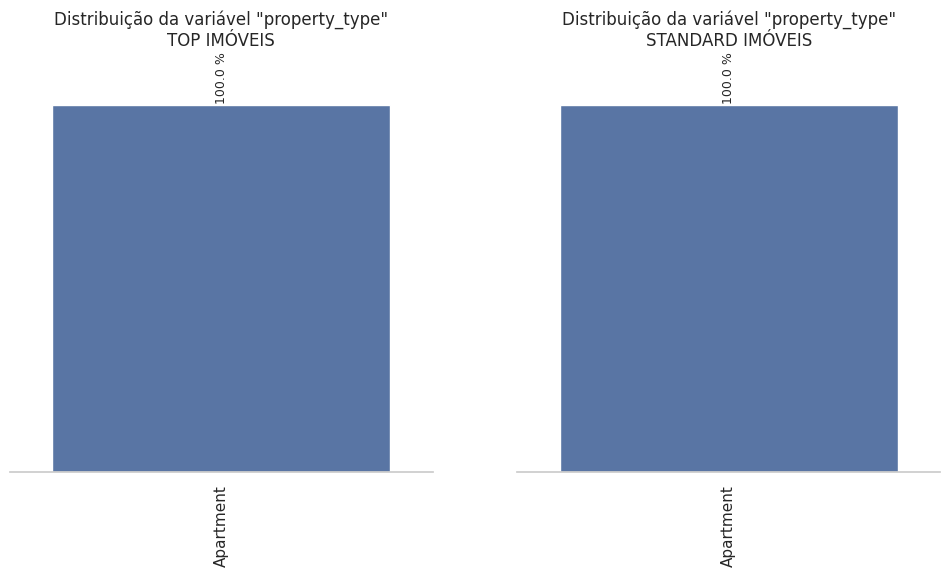

In [ ]:
# Análise do 'tipo de imóvel'
plota_cat2( top_3 , resto_3 , 'property_type', 12,5, 30, 0.5, 1)

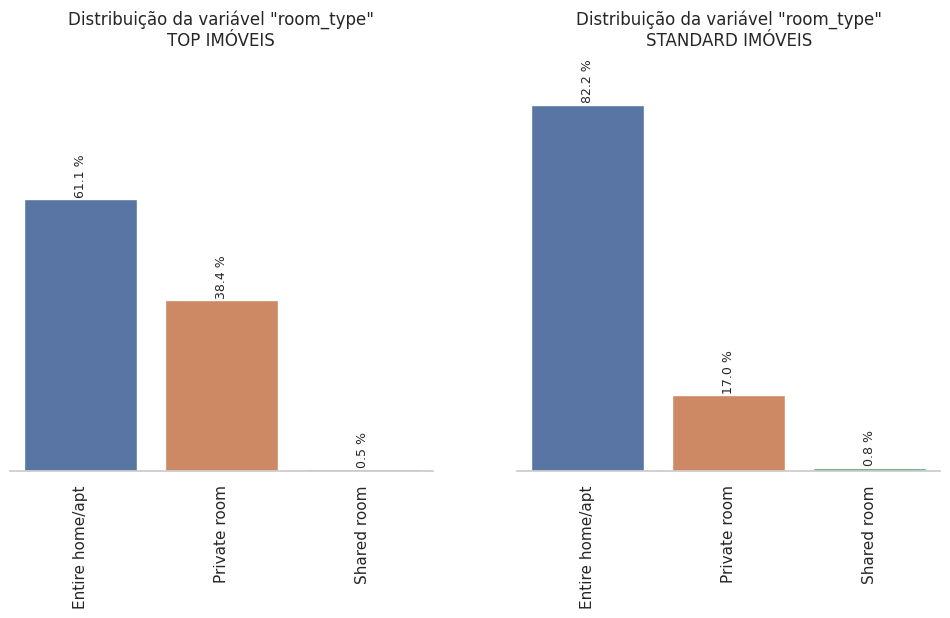

In [ ]:
# Análise do 'tipo de quarto'
plota_cat2( top_3 , resto_3 , 'room_type', 12,5, 30, 0.5, 1)

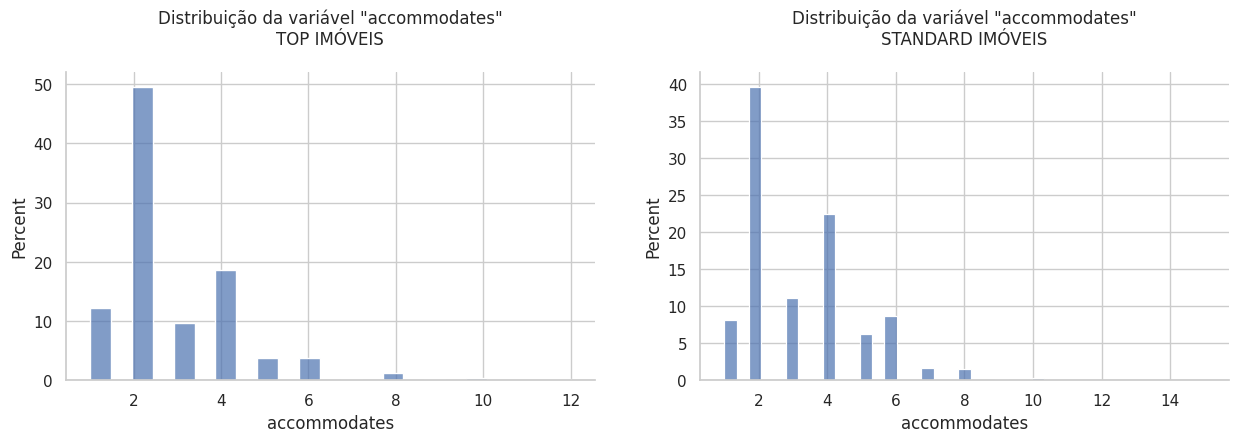

In [ ]:
# Análise do número de acomodações
plota_num2(top_3, resto_3,'accommodates',15,4,'percent',20)

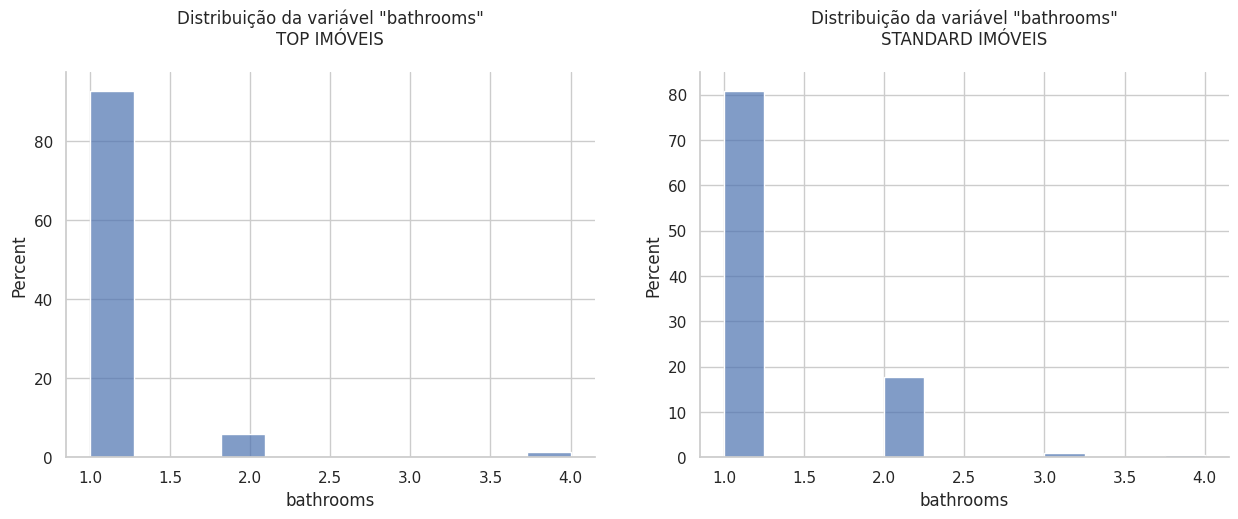

In [ ]:
# Análise da quantidade de banheiros
plota_num2(top_3, resto_3,'bathrooms',15,5,'percent',20)

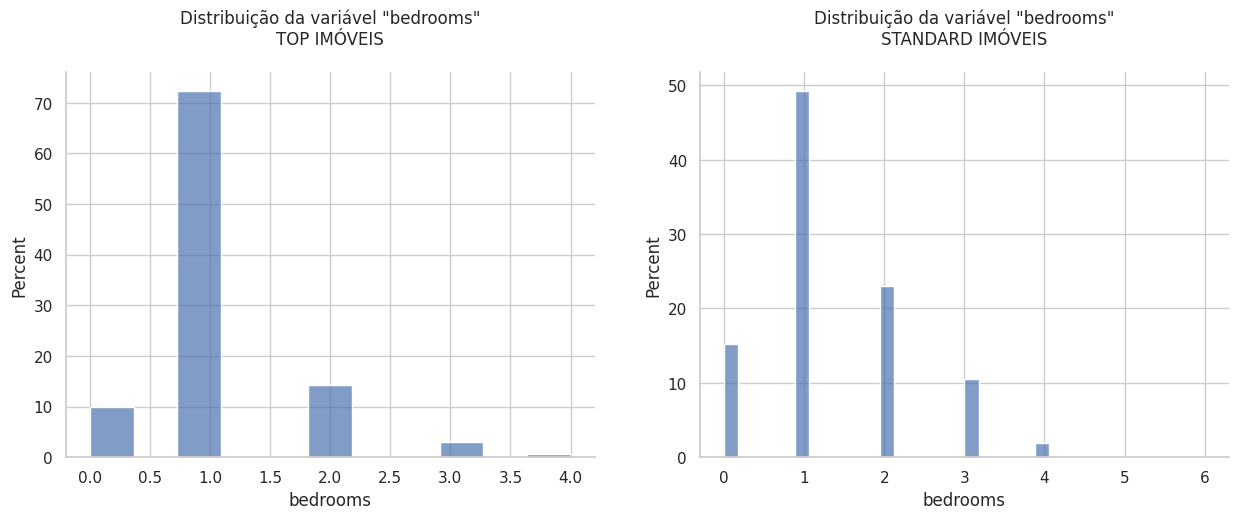

In [ ]:
# Análise da quantidade de quartos
plota_num2(top_3, resto_3,'bedrooms',15,5,'percent',20)

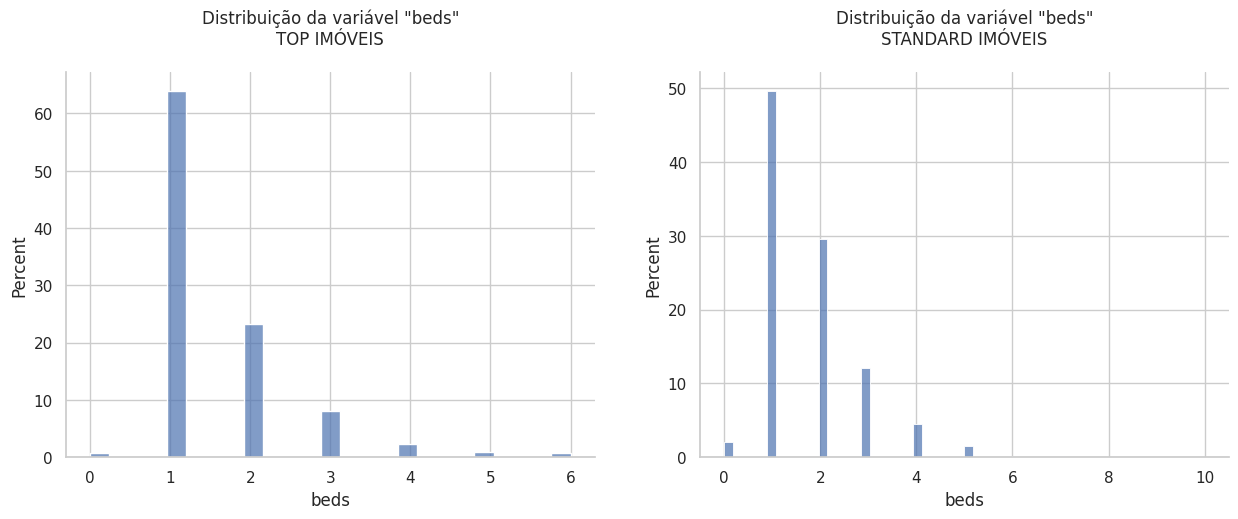

In [ ]:
# Análise da quantidade de camas
plota_num2(top_3, resto_3,'beds',15,5,'percent',20)

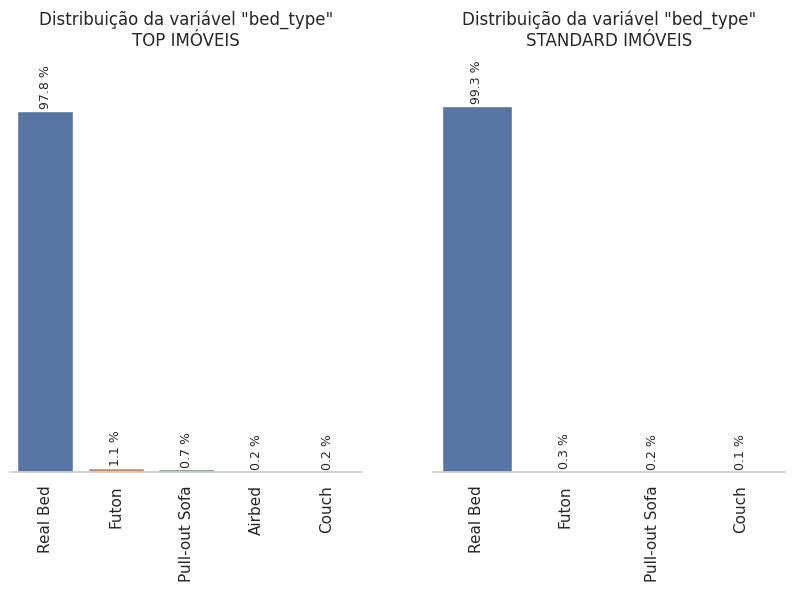

In [ ]:
# Análise do 'tipo de cama'
plota_cat2( top_3 , resto_3 , 'bed_type', 10,5, 30, 0.5, 1)

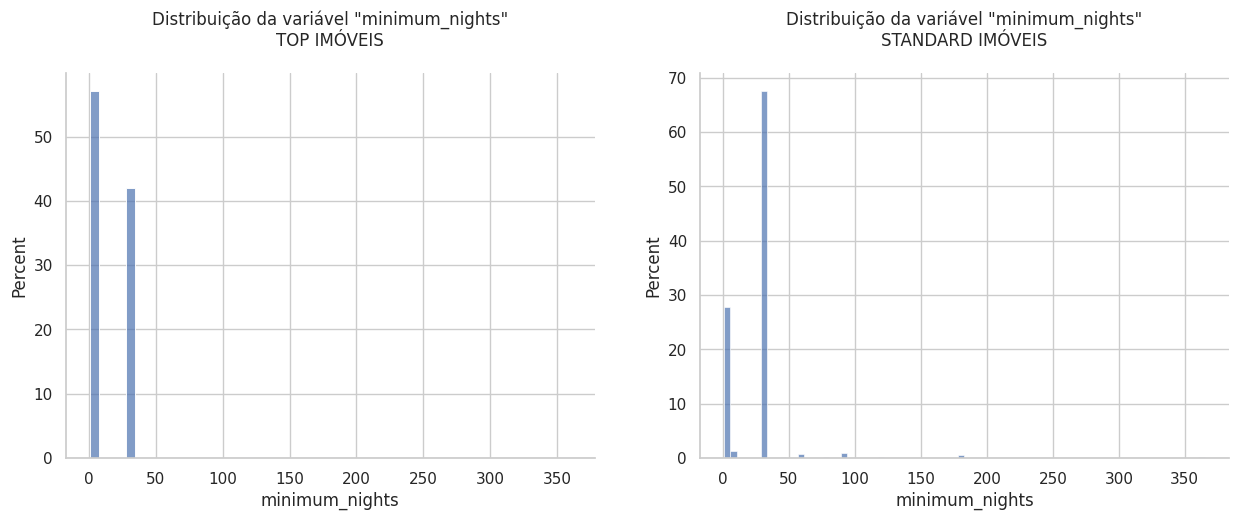

In [ ]:
# Análise do número mínimo de noites
plota_num2(top_3, resto_3,'minimum_nights',15,5,'percent',20)

###Definição de preço

In [ ]:
# Calculando novo preço para os imóveis Restantes e visualizando algumas instâncias

# Chamando o modelo de regressão
reg_3 = feature_importance(top_3, resto_3, 5 , 0.01 , 500, 2)

# Visualizando métricas
reg_3.metrics()

RMSE = $ 61.55
R² = 0.37


In [ ]:
# Salvando o modelo de regressão treinado nos dados do cluster
modelo_3 = reg_3.extract_model()
encoder_3 = reg_3.extract_encoder()
scaler_3 = reg_3.extract_scaler()

In [ ]:
# Chamando o método de novas predições
novo_3 = reg_3.predict_price()

# Criando planilha com a sugestão de preço dos novos imóveis
novo_3.to_excel(f'Novos preços - Cluster 0.xlsx', index=False)

In [ ]:
# Visualizando algumas instâncias
novo_3[['ID','price','new_price']].sample(5)

ID  price  new_price
84    1507  350.0      182.2
282   3925  100.0      158.3
588   4393  120.0      123.2
721   4654  499.0      301.1
1196  6234  200.0      177.1

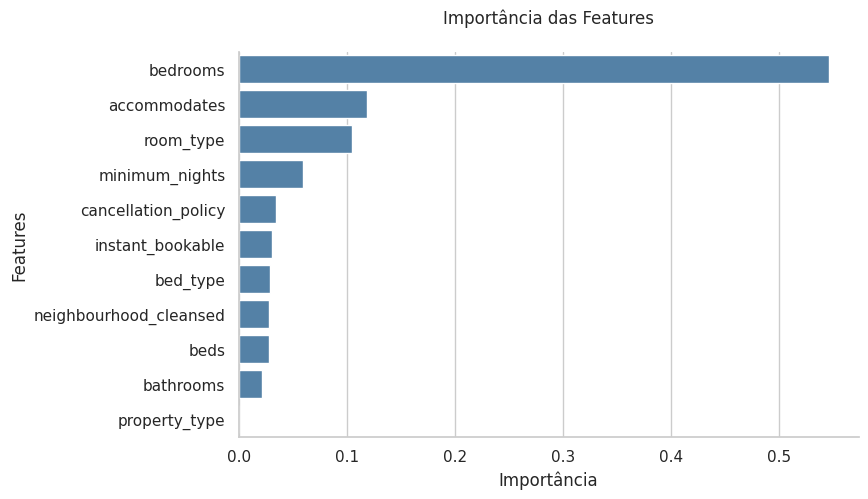

In [ ]:
# Exibindo o gráfico de feature importance
reg_3.feature_importance_plot()

##Cluster 4

In [ ]:
# Chamando a função que cria métricas:
df_cluster4 = eficiencia(df_cluster4)

In [ ]:
# Visualizando instâncias aleatórias
df_cluster4[['ID', 'price','number_of_reviews','p/n','n/p','efic']].sample(5)

ID  price  number_of_reviews          p/n       n/p      efic
2178  2178  251.0               42.0     5.976190  0.167331  0.325546
5096  5096  139.0                0.1  1390.000000  0.000719  0.001439
3515  3515  170.0                2.0    85.000000  0.011765  0.023526
3199  3199   60.0               64.0     0.937500  1.066667  0.997921
3080  3080  175.0               54.0     3.240741  0.308571  0.563489

In [ ]:
# Separando os imóveis de acordo com a eficiência
# Ponto de corte: 80% da eficiência acumulada
# Referência: Princípio de Pareto

top_4, resto_4 = separa_imoveis(df_cluster4, 80, 0)


  Responsáveis por 80% da eficiência global: 547 imóveis
  Quantidade total de imóveis:               1882 imóveis
  Responsáveis por 80% da eficiência global: 29.1 %
    


###Comparação TOP x Standard

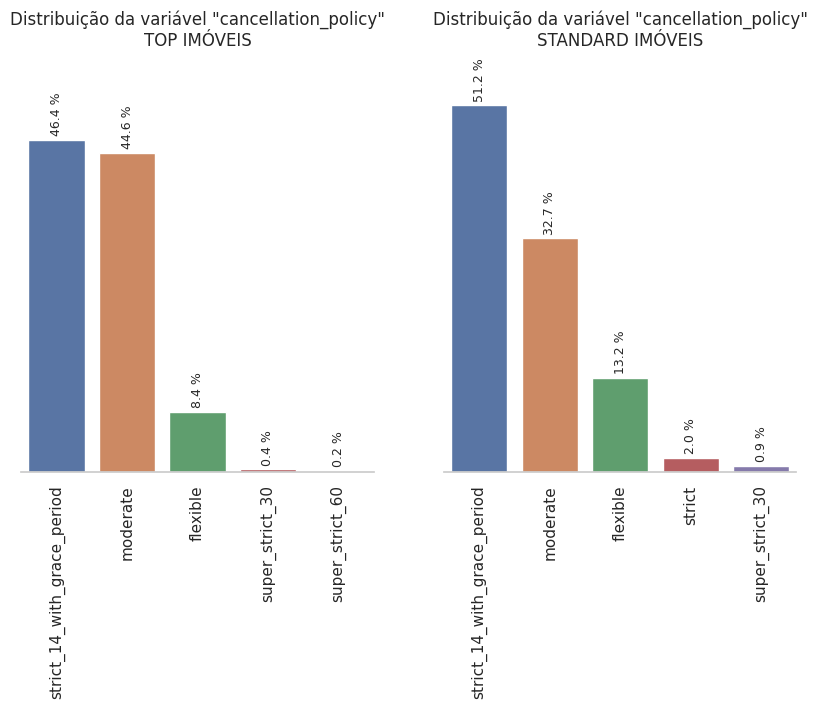

In [ ]:
# Análise do 'politica de cancelamento'
plota_cat2( top_4 , resto_4 , 'cancellation_policy', 10,5, 30, 0.5, 1)

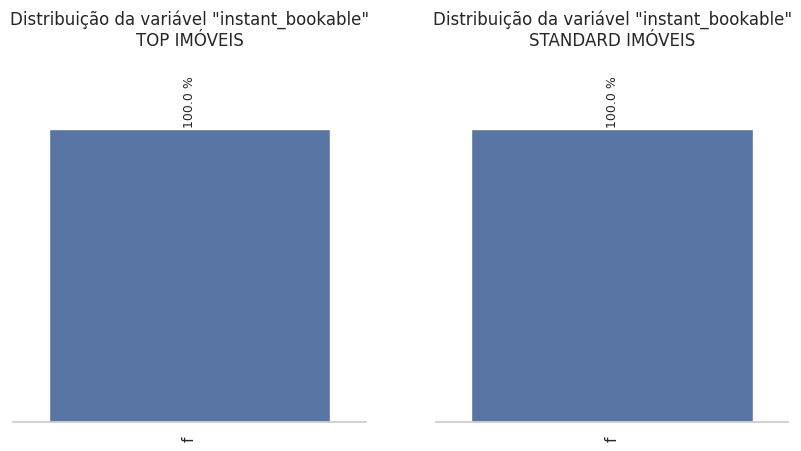

In [ ]:
# Análise de 'instantaneamente bookavel'
plota_cat2( top_4 , resto_4 , 'instant_bookable', 10,4, 50, 0.5, 1)

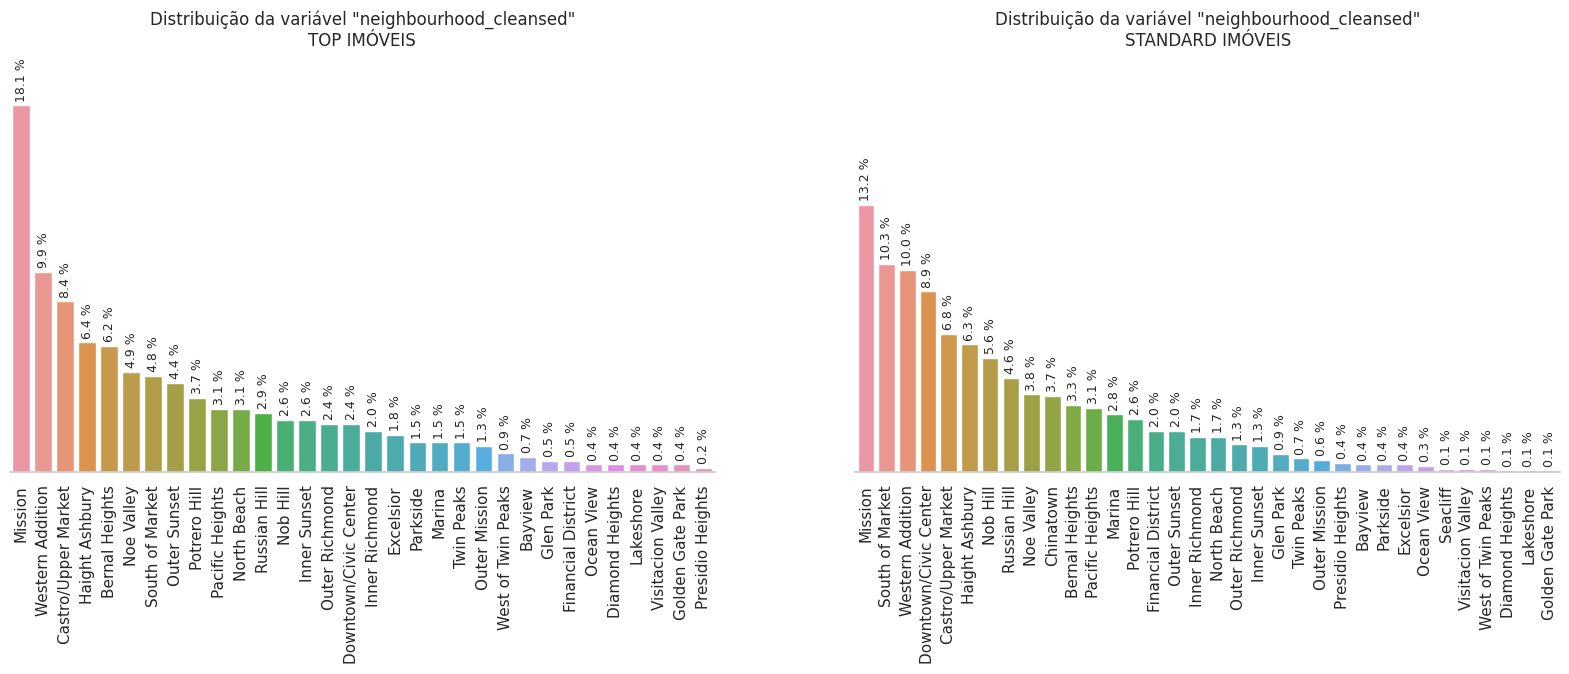

In [ ]:
# Análise das características da vizinhança
plota_cat2( top_4 , resto_4 , 'neighbourhood_cleansed', 20,5, 30, 0.2, 1)

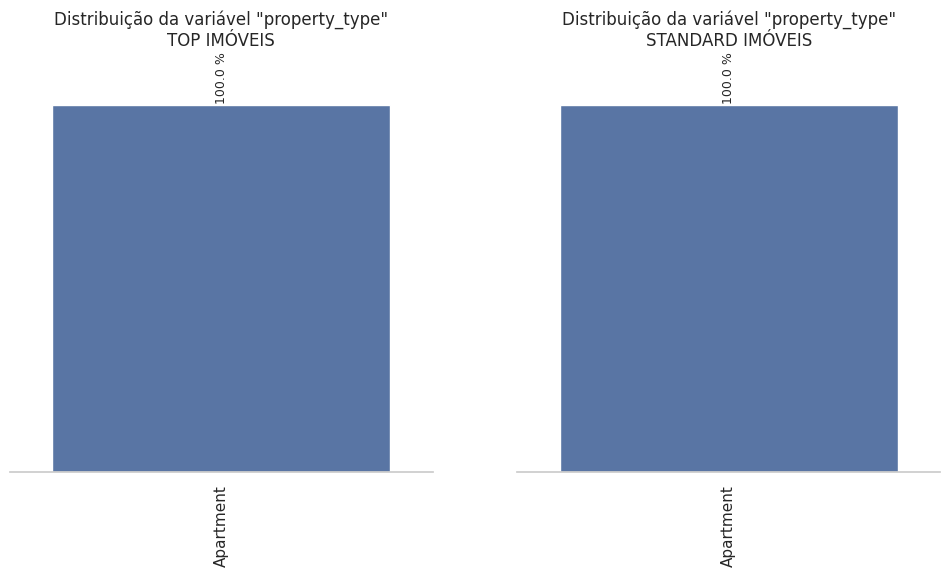

In [ ]:
# Análise do 'tipo de imóvel'
plota_cat2( top_4 , resto_4 , 'property_type', 12,5, 30, 0.5, 1)

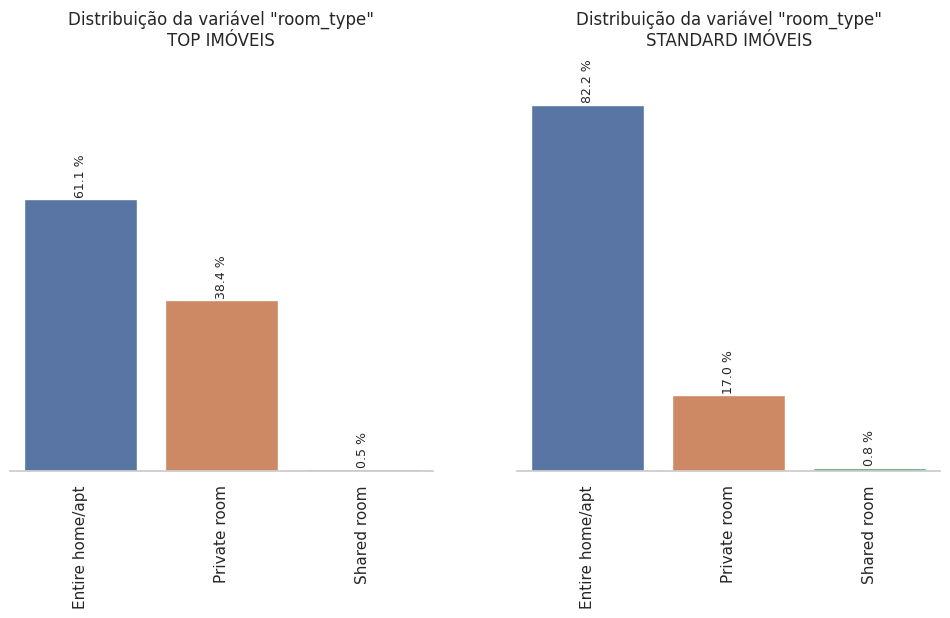

In [ ]:
# Análise do 'tipo de quarto'
plota_cat2( top_4 , resto_4 , 'room_type', 12,5, 30, 0.5, 1)

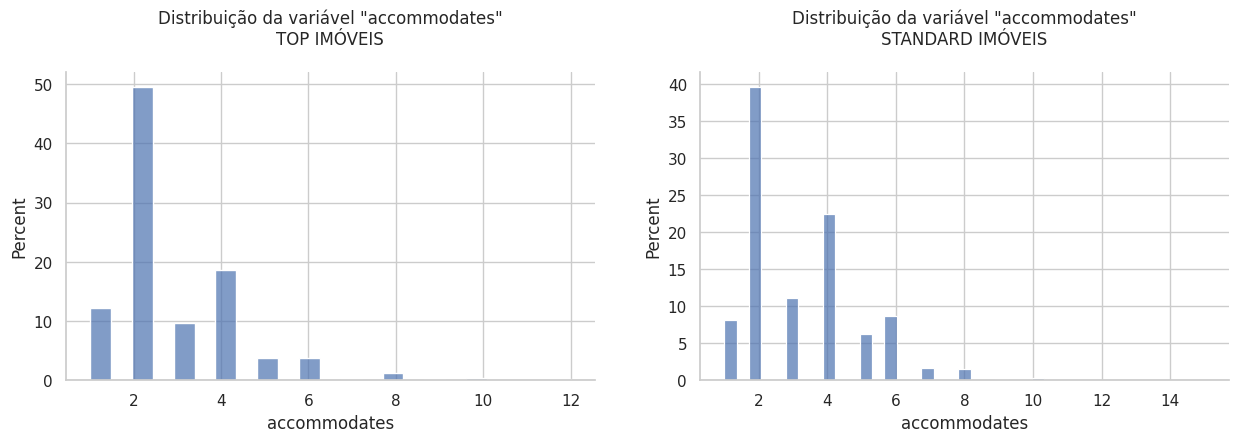

In [ ]:
# Análise do número de acomodações
plota_num2(top_4, resto_4,'accommodates',15,4,'percent',20)

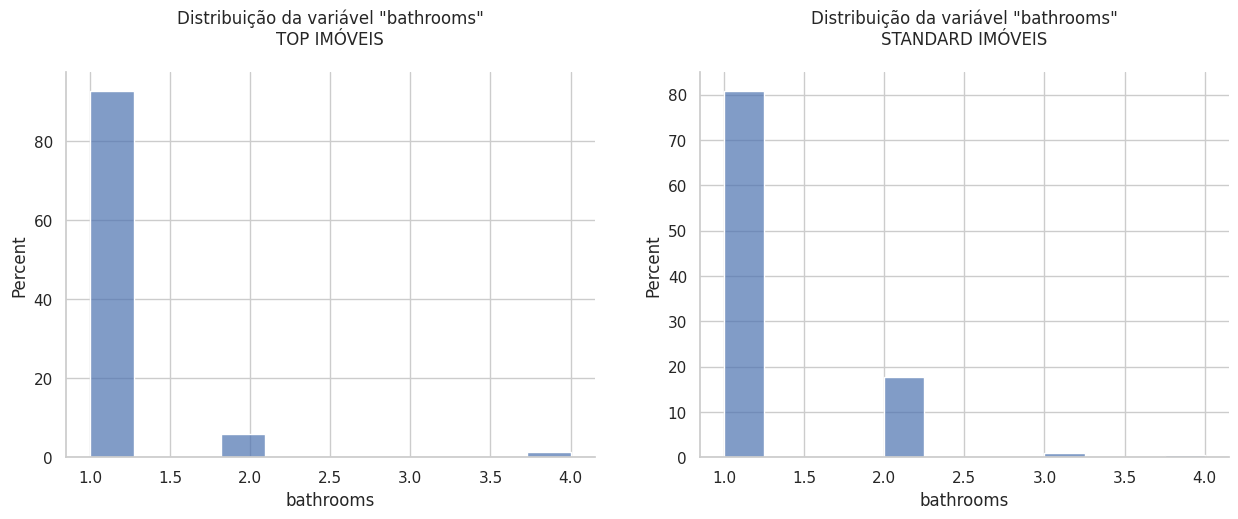

In [ ]:
# Análise da quantidade de banheiros
plota_num2(top_4, resto_4,'bathrooms',15,5,'percent',20)

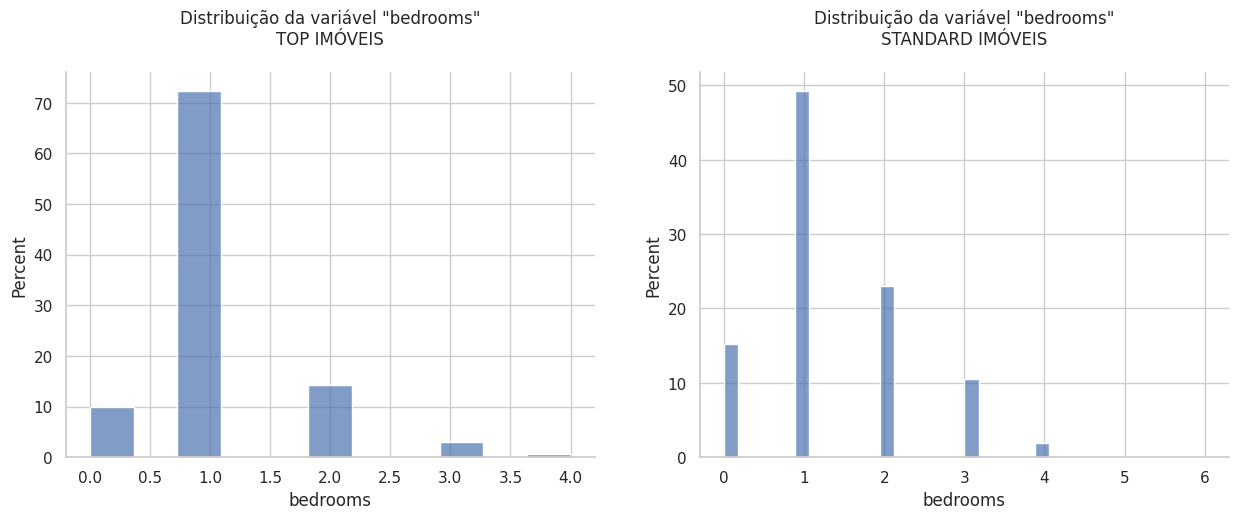

In [ ]:
# Análise da quantidade de quartos
plota_num2(top_4, resto_4,'bedrooms',15,5,'percent',20)

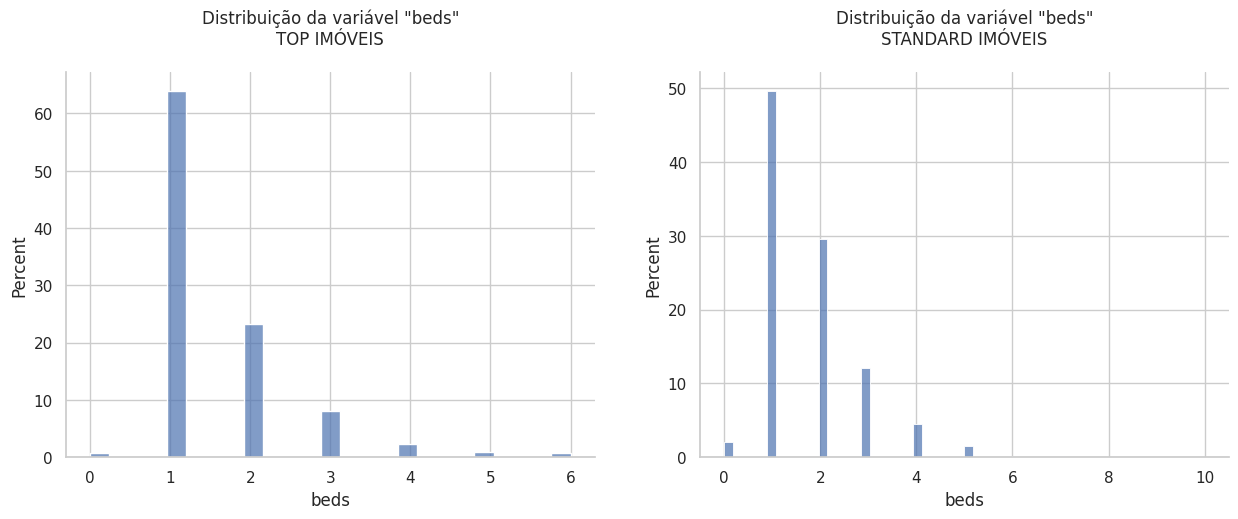

In [ ]:
# Análise da quantidade de camas
plota_num2(top_4, resto_4,'beds',15,5,'percent',20)

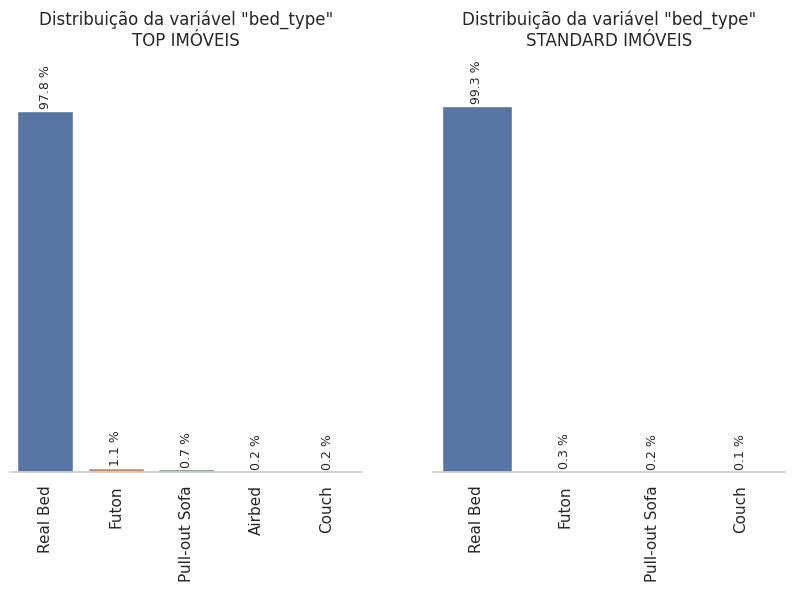

In [ ]:
# Análise do 'tipo de cama'
plota_cat2( top_4 , resto_4 , 'bed_type', 10,5, 30, 0.5, 1)

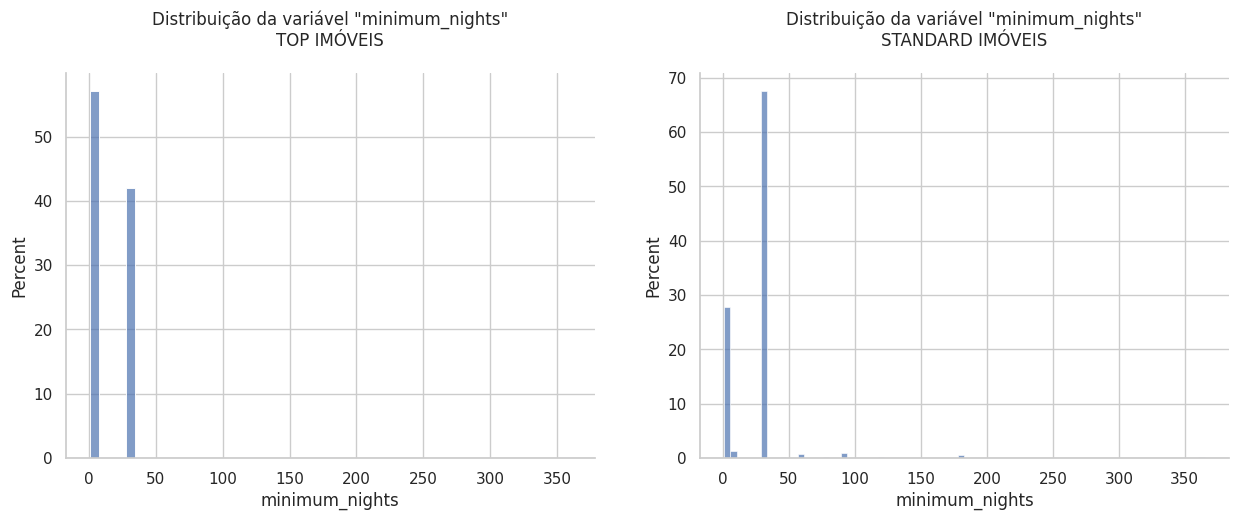

In [ ]:
# Análise do número mínimo de noites
plota_num2(top_4, resto_4,'minimum_nights',15,5,'percent',20)

###Definição de preço

In [ ]:
# Calculando novo preço para os imóveis Restantes e visualizando algumas instâncias

# Chamando o modelo de regressão
reg_4 = feature_importance(top_4, resto_4, 5 , 0.01 , 500, 2)

# Visualizando métricas
reg_4.metrics()

RMSE = $ 61.55
R² = 0.37


In [ ]:
# Salvando o modelo de regressão treinado nos dados do cluster
modelo_4 = reg_4.extract_model()
encoder_4 = reg_4.extract_encoder()
scaler_4 = reg_4.extract_scaler()

In [ ]:
# Chamando o método de novas predições
novo_4 = reg_4.predict_price()

# Criando planilha com a sugestão de preço dos novos imóveis
novo_4.to_excel(f'Novos preços - Cluster 0.xlsx', index=False)

In [ ]:
# Visualizando algumas instâncias
novo_4[['ID','price','new_price']].sample(5)

ID  price  new_price
933   6137  162.0      139.9
639   6954  180.0      149.6
688    387   95.0      136.1
312   4993  146.0      126.2
1212  4619  211.0      107.8

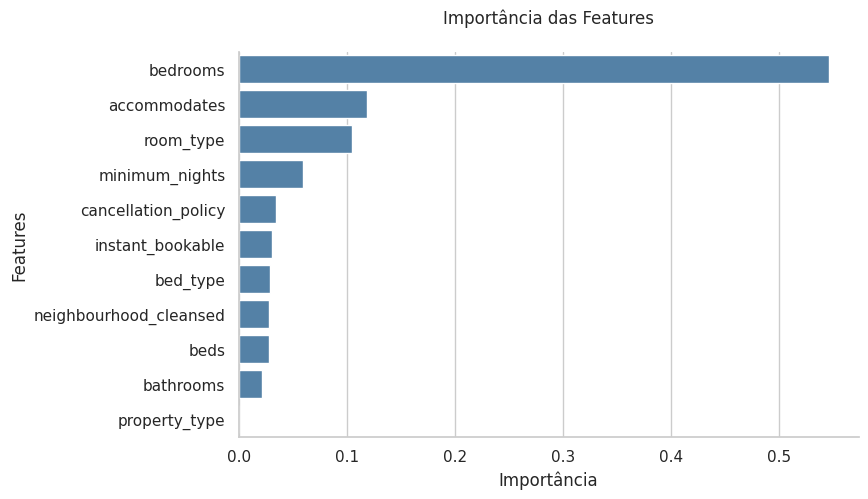

In [ ]:
# Exibindo o gráfico de feature importance
reg_4.feature_importance_plot()

##Cluster 5

In [ ]:
# Chamando a função que cria métricas:
df_cluster5 = eficiencia(df_cluster5)

In [ ]:
# Visualizando instâncias aleatórias
df_cluster5[['ID', 'price','number_of_reviews','p/n','n/p','efic']].sample(5)

ID  price  number_of_reviews          p/n       n/p      efic
4810  4810  115.0                2.0    57.500000  0.017391  0.034772
5121  5121  139.0                0.1  1390.000000  0.000719  0.001439
4663  4663  150.0               26.0     5.769231  0.173333  0.336555
3073  3073  139.0               28.0     4.964286  0.201439  0.387167
882    882  115.0               23.0     5.000000  0.200000  0.384615

In [ ]:
# Separando os imóveis de acordo com a eficiência
# Ponto de corte: 80% da eficiência acumulada
# Referência: Princípio de Pareto

top_5, resto_5 = separa_imoveis(df_cluster5, 80, 0)


  Responsáveis por 80% da eficiência global: 547 imóveis
  Quantidade total de imóveis:               1882 imóveis
  Responsáveis por 80% da eficiência global: 29.1 %
    


###Comparação TOP x Standard

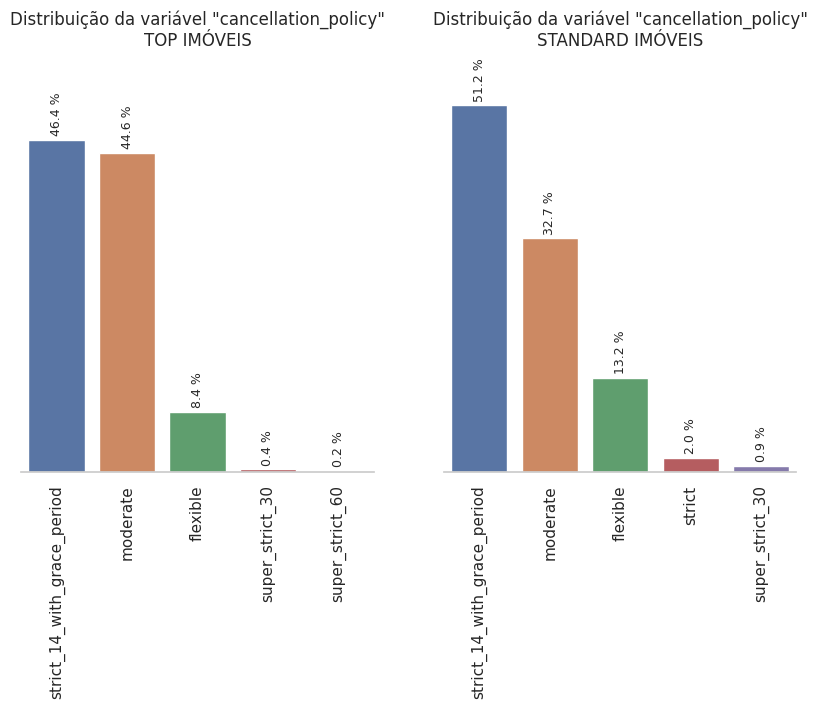

In [ ]:
# Análise do 'politica de cancelamento'
plota_cat2( top_5 , resto_5 , 'cancellation_policy', 10,5, 30, 0.5, 1)

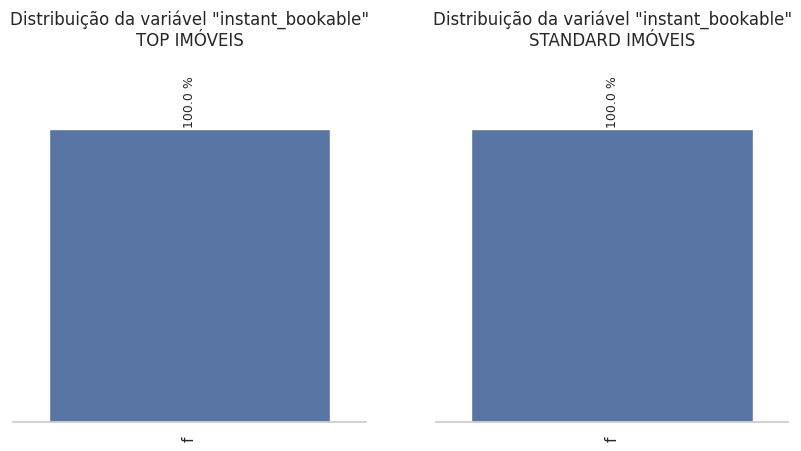

In [ ]:
# Análise de 'instantaneamente bookavel'
plota_cat2( top_5 , resto_5 , 'instant_bookable', 10,4, 50, 0.5, 1)

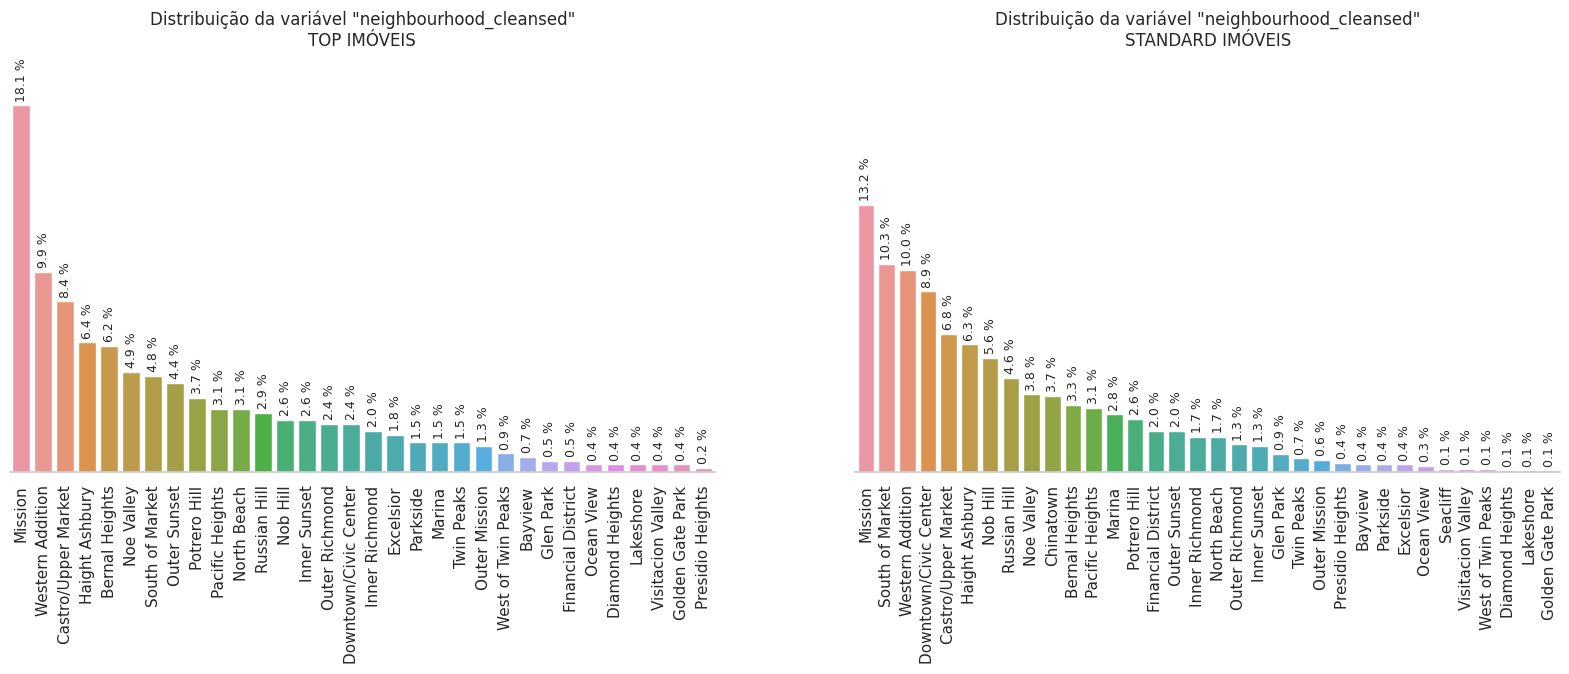

In [ ]:
# Análise das características da vizinhança
plota_cat2( top_5 , resto_5 , 'neighbourhood_cleansed', 20,5, 30, 0.2, 1)

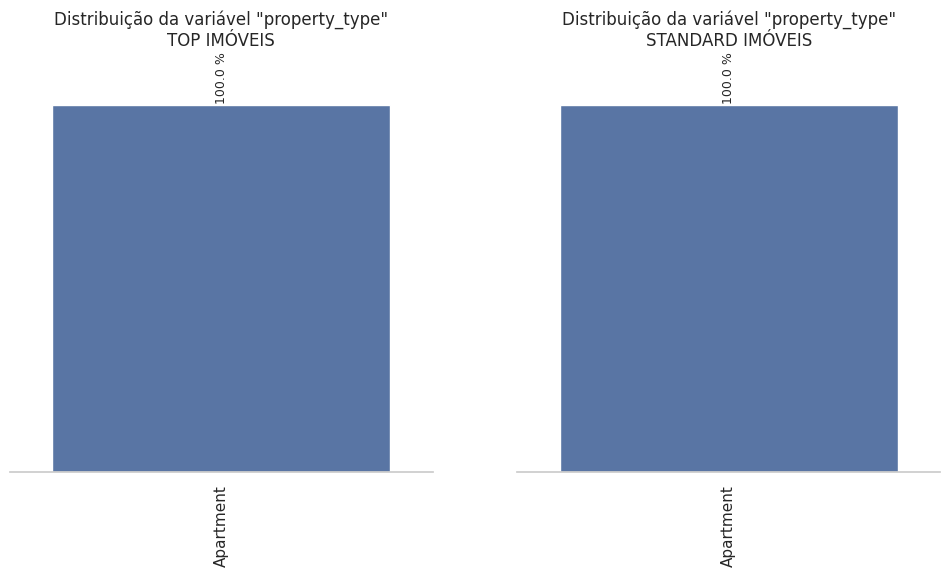

In [ ]:
# Análise do 'tipo de imóvel'
plota_cat2( top_5 , resto_5 , 'property_type', 12,5, 30, 0.5, 1)

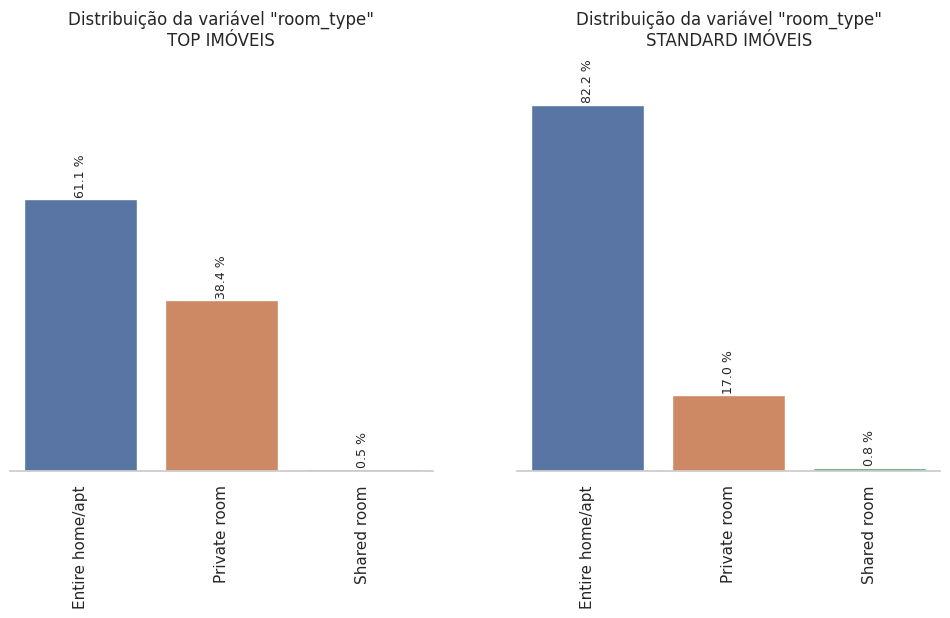

In [ ]:
# Análise do 'tipo de quarto'
plota_cat2( top_5 , resto_5 , 'room_type', 12,5, 30, 0.5, 1)

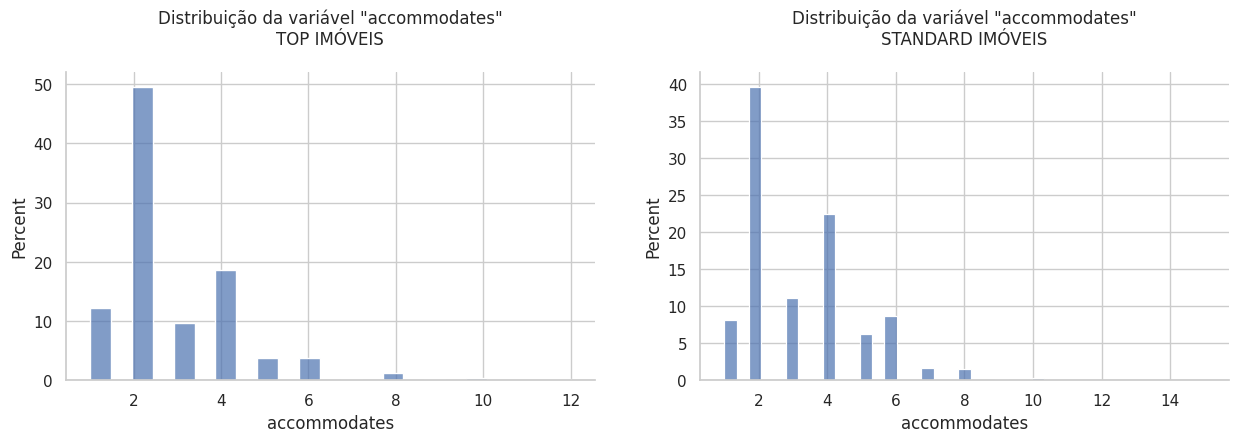

In [ ]:
# Análise do número de acomodações
plota_num2(top_5, resto_5,'accommodates',15,4,'percent',20)

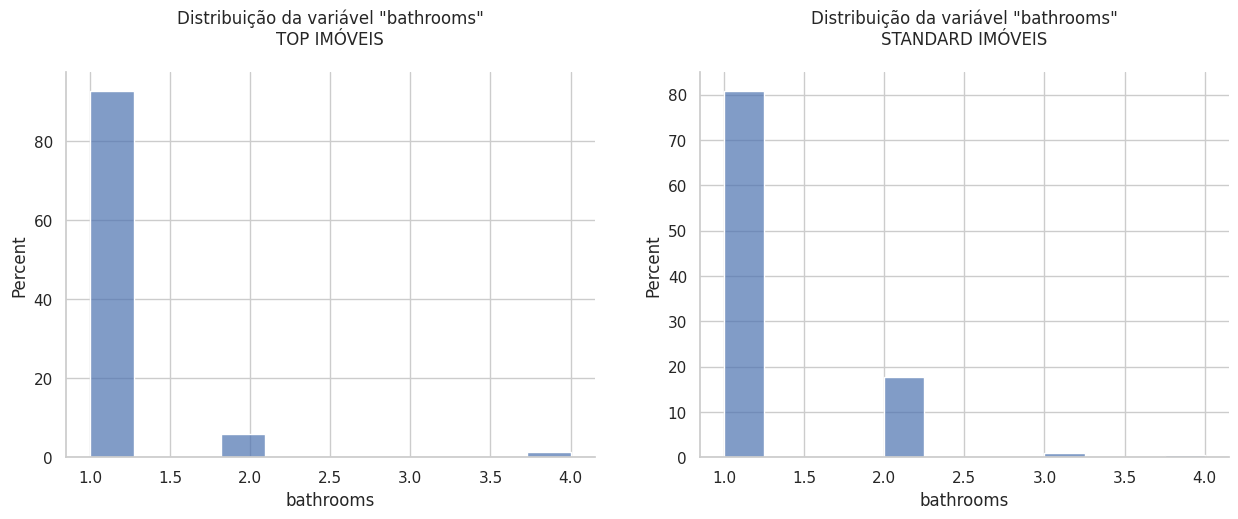

In [ ]:
# Análise da quantidade de banheiros
plota_num2(top_5, resto_5,'bathrooms',15,5,'percent',20)

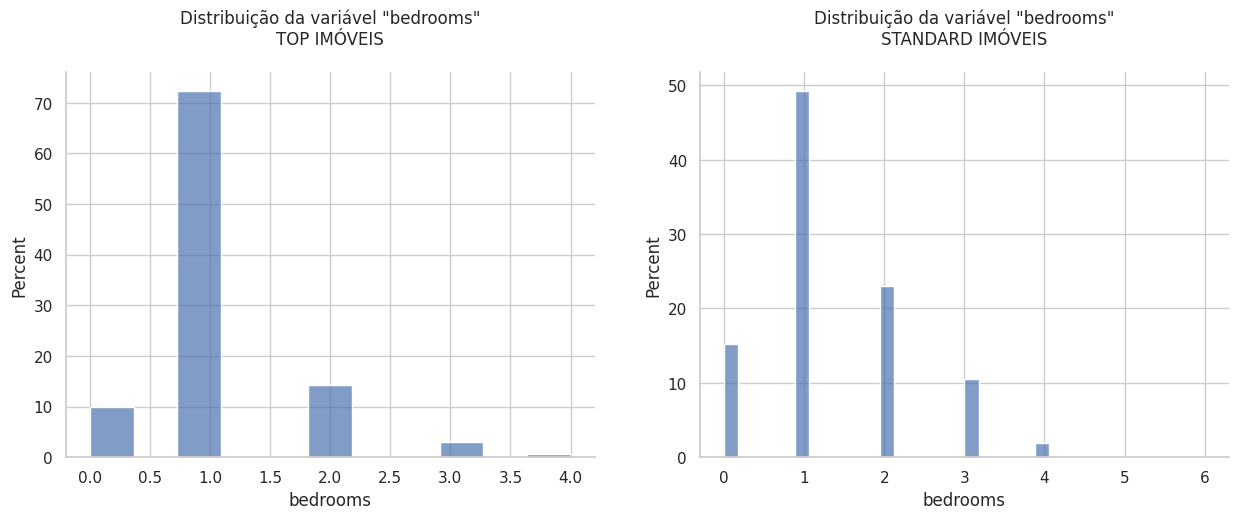

In [ ]:
# Análise da quantidade de quartos
plota_num2(top_5, resto_5,'bedrooms',15,5,'percent',20)

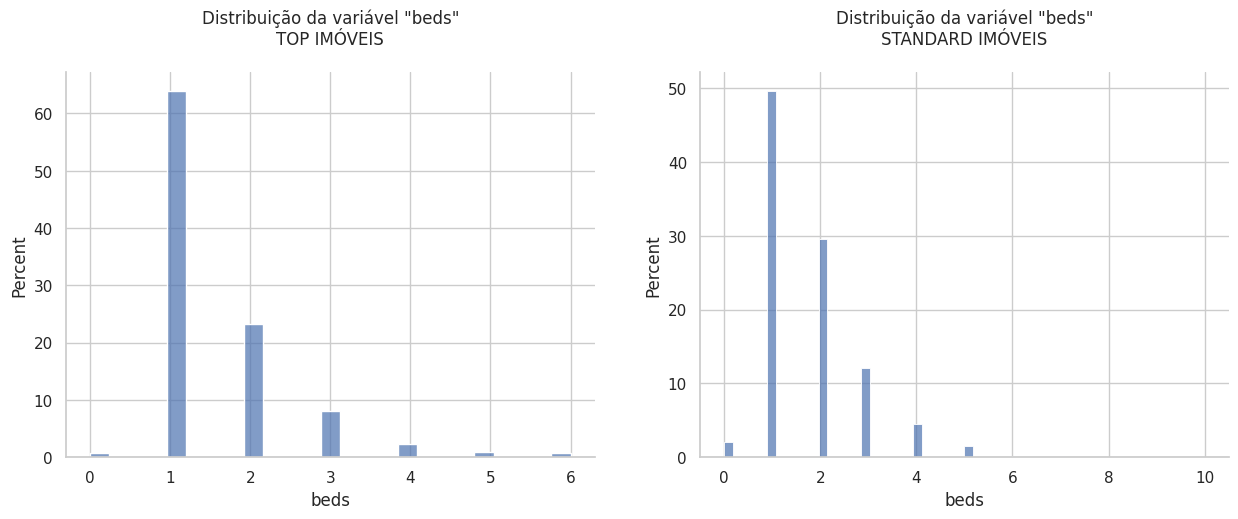

In [ ]:
# Análise da quantidade de camas
plota_num2(top_5, resto_5,'beds',15,5,'percent',20)

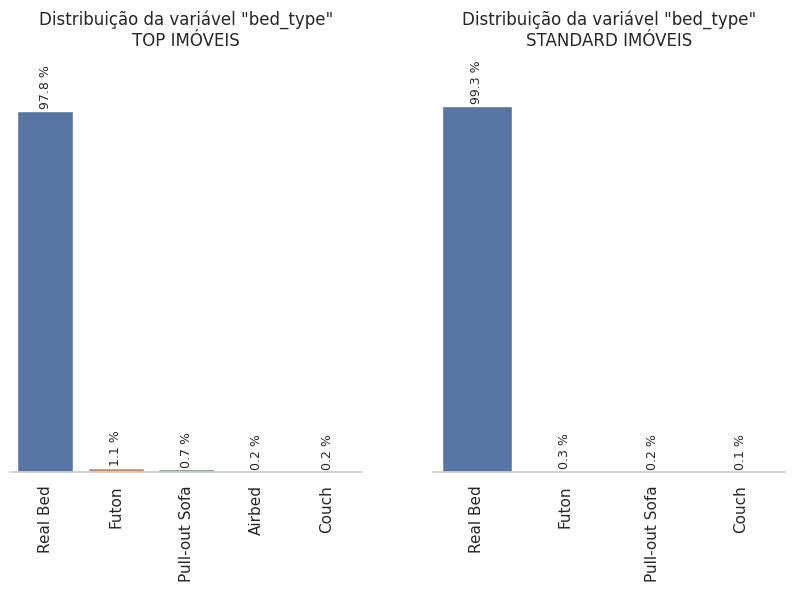

In [ ]:
# Análise do 'tipo de cama'
plota_cat2( top_5 , resto_5 , 'bed_type', 10,5, 30, 0.5, 1)

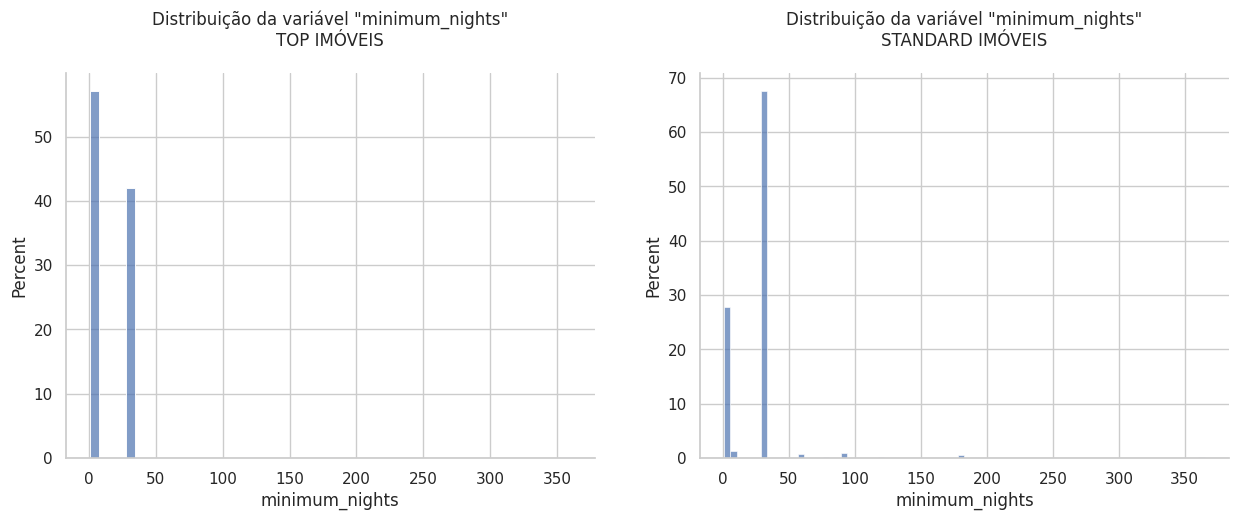

In [ ]:
# Análise do número mínimo de noites
plota_num2(top_5, resto_5,'minimum_nights',15,5,'percent',20)

###Definição de preço

In [ ]:
# Calculando novo preço para os imóveis Restantes e visualizando algumas instâncias

# Chamando o modelo de regressão
reg_5 = feature_importance(top_5, resto_5, 5 , 0.01 , 500, 2)

# Visualizando métricas
reg_4.metrics()

RMSE = $ 61.55
R² = 0.37


In [ ]:
# Salvando o modelo de regressão treinado nos dados do cluster
modelo_5 = reg_5.extract_model()
encoder_5 = reg_5.extract_encoder()
scaler_5 = reg_5.extract_scaler()

In [ ]:
# Chamando o método de novas predições
novo_5 = reg_5.predict_price()

# Criando planilha com a sugestão de preço dos novos imóveis
novo_5.to_excel(f'Novos preços - Cluster 0.xlsx', index=False)

In [ ]:
# Visualizando algumas instâncias
novo_5[['ID','price','new_price']].sample(5)

ID  price  new_price
816  2485  165.0      132.0
853  1863  750.0      247.9
313   340  125.0       93.8
351  2910  339.0      316.6
212  1963   85.0       93.8

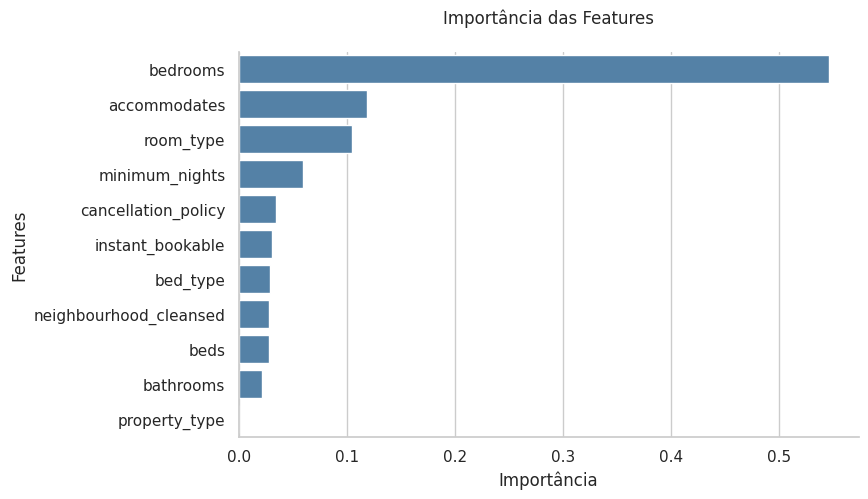

In [ ]:
# Exibindo o gráfico de feature importance
reg_5.feature_importance_plot()

#5) EXPORTANDO OS MODELOS

In [ ]:
# Exportando todos os objetos
with open('objects.pkl', 'wb') as f:
    pickle.dump(( kmeans_norm, pca_normalizacao, encoder, norm_scaler,
                 encoder_0, encoder_1, encoder_2, encoder_3, encoder_4, encoder_5,
                  scaler_0, scaler_1, scaler_2, scaler_3, scaler_4, scaler_5,
                  modelo_0, modelo_1, modelo_2, modelo_3, modelo_4, modelo_5), f)